In [ ]:
#Instalaciones para graficar los árboles
!sudo apt install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Data Set Information:

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.


#Attribute Information:

#####01 date : Date in MM-DD-YYYY
#####02 day : Day of the Week
#####03 quarter : A portion of the month. A month was divided into four quarters
#####04 department : Associated department with the instance
#####05 team_no : Associated team number with the instance
#####06 no_of_workers : Number of workers in each team
#####07 no_of_style_change : Number of changes in the style of a particular product
#####08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.
#####09 smv : Standard Minute Value, it is the allocated time for a task
#####10 wip : Work in progress. Includes the number of unfinished items for products
#####11 over_time : Represents the amount of overtime by each team in minutes
#####12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
#####13 idle_time : The amount of time when the production was interrupted due to several reasons
#####14 idle_men : The number of workers who were idle due to production interruption
#####15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.



#1. Cargar Datos

In [ ]:
#@title Productivity Prediction of Garment Employees: Productivity_train.csv
%%writefile Productivity_train.csv
date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1/1/2015,Quarter1,sweing,Thursday,8,0.8,26.16,1108,7080,98,0,0,0,59,0.940725424
1/1/2015,Quarter1,finishing ,Thursday,1,0.75,3.94,,960,0,0,0,0,8,0.8865
1/1/2015,Quarter1,sweing,Thursday,11,0.8,11.41,968,3660,50,0,0,0,30.5,0.800570492
1/1/2015,Quarter1,sweing,Thursday,12,0.8,11.41,968,3660,50,0,0,0,30.5,0.800570492
1/1/2015,Quarter1,sweing,Thursday,6,0.8,25.9,1170,1920,50,0,0,0,56,0.800381944
1/1/2015,Quarter1,sweing,Thursday,7,0.8,25.9,984,6720,38,0,0,0,56,0.800125
1/1/2015,Quarter1,finishing ,Thursday,2,0.75,3.94,,960,0,0,0,0,8,0.755166667
1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795,6900,45,0,0,0,57.5,0.753683478
1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733,6000,34,0,0,0,55,0.753097531
1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681,6900,45,0,0,0,57.5,0.750427826
1/1/2015,Quarter1,sweing,Thursday,9,0.7,28.08,872,6900,44,0,0,0,57.5,0.721126957
1/1/2015,Quarter1,sweing,Thursday,10,0.75,19.31,578,6480,45,0,0,0,54,0.712205247
1/1/2015,Quarter1,sweing,Thursday,5,0.8,11.41,668,3660,50,0,0,0,30.5,0.707045902
1/1/2015,Quarter1,finishing ,Thursday,10,0.65,3.94,,960,0,0,0,0,8,0.705916667
1/1/2015,Quarter1,finishing ,Thursday,8,0.75,2.9,,960,0,0,0,0,8,0.676666667
1/1/2015,Quarter1,finishing ,Thursday,4,0.75,3.94,,2160,0,0,0,0,18,0.593055556
1/1/2015,Quarter1,finishing ,Thursday,7,0.8,2.9,,960,0,0,0,0,8,0.540729167
1/1/2015,Quarter1,sweing,Thursday,4,0.65,23.69,861,7200,0,0,0,0,60,0.52118
1/1/2015,Quarter1,finishing,Thursday,11,0.7,4.15,,1440,0,0,0,0,12,0.436326389
1/3/2015,Quarter1,finishing ,Saturday,4,0.8,4.15,,6600,0,0,0,0,20,0.988024691
1/3/2015,Quarter1,finishing ,Saturday,11,0.75,2.9,,5640,0,0,0,0,17,0.987880435
1/3/2015,Quarter1,finishing ,Saturday,9,0.8,4.15,,960,0,0,0,0,8,0.956270833
1/3/2015,Quarter1,finishing ,Saturday,3,0.75,3.94,,1560,0,0,0,0,8,0.945277778
1/3/2015,Quarter1,finishing ,Saturday,1,0.8,3.94,,960,0,0,0,0,8,0.902916667
1/3/2015,Quarter1,sweing,Saturday,1,0.8,28.08,772,6300,50,0,0,0,56.5,0.800725314
1/3/2015,Quarter1,sweing,Saturday,3,0.8,28.08,913,6540,50,0,0,0,54.5,0.800322936
1/3/2015,Quarter1,sweing,Saturday,8,0.8,26.16,1261,7080,50,0,0,0,59,0.800318644
1/3/2015,Quarter1,sweing,Saturday,12,0.8,26.16,844,7080,63,0,0,0,59,0.800318644
1/3/2015,Quarter1,sweing,Saturday,11,0.8,11.61,1005,7080,50,0,0,0,29.5,0.800237288
1/3/2015,Quarter1,sweing,Saturday,5,0.8,11.61,659,7080,50,0,0,0,31.5,0.800148649
1/3/2015,Quarter1,sweing,Saturday,6,0.8,25.9,1152,6720,50,0,0,0,56,0.800125
1/3/2015,Quarter1,sweing,Saturday,7,0.8,25.9,1138,6720,38,0,0,0,56,0.800125
1/3/2015,Quarter1,sweing,Saturday,10,0.75,19.31,610,6480,56,0,0,0,54,0.787299691
1/3/2015,Quarter1,finishing ,Saturday,2,0.8,4.15,,960,0,0,0,0,8,0.782447917
1/3/2015,Quarter1,sweing,Saturday,2,0.75,19.87,944,6600,45,0,0,0,55,0.75024303
1/3/2015,Quarter1,finishing ,Saturday,10,0.7,4.15,,960,0,0,0,0,8,0.7018125
1/3/2015,Quarter1,sweing,Saturday,4,0.7,23.69,544,13800,0,0,0,0,60,0.700134038
1/3/2015,Quarter1,sweing,Saturday,9,0.7,28.08,1072,6900,40,0,0,0,57.5,0.699965217
1/3/2015,Quarter1,finishing ,Saturday,8,0.8,2.9,,960,0,0,0,0,8,0.628333333
1/3/2015,Quarter1,finishing ,Saturday,7,0.8,3.94,,960,0,0,0,0,8,0.6253125
1/4/2015,Quarter1,finishing ,Sunday,3,0.75,4.15,,1560,0,0,0,0,8,0.991388889
1/4/2015,Quarter1,finishing ,Sunday,9,0.8,3.94,,960,0,0,0,0,8,0.931645833
1/4/2015,Quarter1,finishing ,Sunday,1,0.8,3.94,,960,0,0,0,0,8,0.915229167
1/4/2015,Quarter1,sweing,Sunday,6,0.8,11.61,539,6975,50,0,0,0,31,0.879714482
1/4/2015,Quarter1,finishing ,Sunday,4,0.8,3.94,,6600,0,0,0,0,20,0.861679012
1/4/2015,Quarter1,sweing,Sunday,9,0.8,26.16,1278,7080,60,0,0,0,59,0.850569492
1/4/2015,Quarter1,sweing,Sunday,7,0.8,25.9,1227,7020,60,0,0,0,56.5,0.850436438
1/4/2015,Quarter1,sweing,Sunday,8,0.8,25.9,1039,6780,45,0,0,0,56.5,0.850345133
1/4/2015,Quarter1,sweing,Sunday,4,0.8,28.08,878,4260,50,0,0,0,55.5,0.800598058
1/4/2015,Quarter1,sweing,Sunday,1,0.8,26.16,1033,7080,63,0,0,0,59,0.800318644
1/4/2015,Quarter1,sweing,Sunday,2,0.8,28.08,782,6660,50,0,0,0,55.5,0.800237838
1/4/2015,Quarter1,sweing,Sunday,12,0.8,11.61,1216,6975,50,0,0,0,31,0.800030199
1/4/2015,Quarter1,finishing ,Sunday,2,0.8,3.94,,960,0,0,0,0,8,0.792104167
1/4/2015,Quarter1,finishing ,Sunday,10,0.7,3.94,,4320,0,0,0,0,18,0.759228395
1/4/2015,Quarter1,sweing,Sunday,11,0.75,19.31,513,6480,45,0,0,0,54,0.750348457
1/4/2015,Quarter1,sweing,Sunday,3,0.75,19.87,734,6600,45,0,0,0,55,0.75024303
1/4/2015,Quarter1,sweing,Sunday,10,0.7,28.08,1202,6900,40,0,0,0,57.5,0.699965217
1/4/2015,Quarter1,finishing ,Sunday,8,0.8,2.9,,960,0,0,0,0,8,0.682708333
1/4/2015,Quarter1,finishing ,Sunday,7,0.8,2.9,,960,0,0,0,0,8,0.667604167
1/4/2015,Quarter1,sweing,Sunday,5,0.7,45.67,884,6960,26,0,0,0,58,0.603432184
1/4/2015,Quarter1,finishing ,Sunday,11,0.75,4.15,,960,0,0,0,0,8,0.345833333
1/5/2015,Quarter1,finishing ,Monday,1,0.8,3.94,,1920,0,0,0,0,8,0.961059028
1/5/2015,Quarter1,finishing ,Monday,11,0.8,3.94,,2400,0,0,0,0,10,0.939513889
1/5/2015,Quarter1,finishing ,Monday,4,0.8,3.94,,3840,0,0,0,0,16,0.893663194
1/5/2015,Quarter1,finishing ,Monday,3,0.75,4.15,,1920,0,0,0,0,8,0.875390625
1/5/2015,Quarter1,sweing,Monday,9,0.8,26.16,1227,7080,75,0,0,0,59,0.850569492
1/5/2015,Quarter1,finishing ,Monday,9,0.8,2.9,,1920,0,0,0,0,8,0.820833333
1/5/2015,Quarter1,finishing ,Monday,2,0.8,3.94,,960,0,0,0,0,8,0.804416667
1/5/2015,Quarter1,sweing,Monday,7,0.8,25.9,1255,6780,50,0,0,0,56.5,0.800684366
1/5/2015,Quarter1,sweing,Monday,8,0.8,25.9,1047,6780,38,0,0,0,56.5,0.800684366
1/5/2015,Quarter1,sweing,Monday,1,0.8,26.16,1138,7080,63,0,0,0,59,0.800318644
1/5/2015,Quarter1,sweing,Monday,11,0.8,19.31,678,4800,50,0,0,0,55,0.800250962
1/5/2015,Quarter1,sweing,Monday,6,0.8,11.61,712,7200,50,0,0,0,32,0.800246011
1/5/2015,Quarter1,sweing,Monday,12,0.8,11.61,1037,7200,50,0,0,0,32,0.800246011
1/5/2015,Quarter1,sweing,Monday,2,0.8,28.08,757,6900,50,0,0,0,57.5,0.800076522
1/5/2015,Quarter1,sweing,Monday,4,0.8,28.08,759,6900,50,0,0,0,57.5,0.800076522
1/5/2015,Quarter1,finishing ,Monday,10,0.75,2.9,,960,0,0,0,0,8,0.763375
1/5/2015,Quarter1,finishing ,Monday,5,0.6,2.9,,960,0,0,0,0,8,0.759270833
1/5/2015,Quarter1,sweing,Monday,10,0.75,28.08,1083,7020,45,0,0,0,58.5,0.7504
1/5/2015,Quarter1,sweing,Monday,3,0.75,19.87,944,6600,45,0,0,0,55,0.75024303
1/5/2015,Quarter1,finishing ,Monday,7,0.8,3.94,,960,0,0,0,0,8,0.676666667
1/5/2015,Quarter1,finishing ,Monday,8,0.8,2.9,,960,0,0,0,0,8,0.664583333
1/5/2015,Quarter1,sweing,Monday,5,0.6,21.98,666,6960,23,0,0,0,58,0.600028736
1/6/2015,Quarter1,finishing ,Tuesday,4,0.8,3.94,,4440,0,0,0,0,18,0.966781346
1/6/2015,Quarter1,finishing ,Tuesday,1,0.8,3.94,,1440,0,0,0,0,8,0.936496212
1/6/2015,Quarter1,finishing ,Tuesday,3,0.75,4.15,,1800,0,0,0,0,10,0.899166667
1/6/2015,Quarter1,finishing ,Tuesday,11,0.8,4.15,,2700,0,0,0,0,15,0.888686869
1/6/2015,Quarter1,finishing ,Tuesday,9,0.8,3.94,,1440,0,0,0,0,8,0.858143939
1/6/2015,Quarter1,sweing,Tuesday,1,0.8,26.16,1187,10620,75,0,0,0,59,0.850502311
1/6/2015,Quarter1,sweing,Tuesday,9,0.8,26.16,1305,10620,75,0,0,0,59,0.850502311
1/6/2015,Quarter1,finishing ,Tuesday,10,0.75,3.94,,1440,0,0,0,0,8,0.809640152
1/6/2015,Quarter1,finishing ,Tuesday,2,0.8,3.94,,1440,0,0,0,0,8,0.805909091
1/6/2015,Quarter1,sweing,Tuesday,2,0.8,28.08,716,10350,50,0,0,0,57.5,0.800594466
1/6/2015,Quarter1,sweing,Tuesday,4,0.8,28.08,925,10350,50,0,0,0,57.5,0.800594466
1/6/2015,Quarter1,sweing,Tuesday,3,0.8,19.87,963,9900,50,0,0,0,55,0.800273829
1/6/2015,Quarter1,sweing,Tuesday,12,0.8,11.61,1101,5310,50,0,0,0,31.5,0.800140969
1/6/2015,Quarter1,sweing,Tuesday,7,0.8,25.9,1035,10170,38,0,0,0,56.5,0.800128721
1/6/2015,Quarter1,sweing,Tuesday,8,0.8,25.9,1083,10170,38,0,0,0,56.5,0.800128721
1/6/2015,Quarter1,sweing,Tuesday,6,0.8,11.61,910,4470,38,0,0,0,31.5,0.80007657
1/6/2015,Quarter1,sweing,Tuesday,10,0.75,28.08,1209,10530,45,0,0,0,58.5,0.750545455
1/6/2015,Quarter1,sweing,Tuesday,11,0.75,19.31,590,9900,45,0,0,0,55,0.750057851
1/6/2015,Quarter1,finishing ,Tuesday,8,0.8,2.9,,1440,0,0,0,0,8,0.681060606
1/6/2015,Quarter1,sweing,Tuesday,5,0.65,21.98,808,10440,35,0,0,0,58,0.649983281
1/6/2015,Quarter1,finishing ,Tuesday,7,0.8,2.9,,1440,0,0,0,0,8,0.61625
1/7/2015,Quarter1,finishing ,Wednesday,1,0.8,3.94,,1440,0,0,0,0,8,0.951420455
1/7/2015,Quarter1,finishing ,Wednesday,9,0.8,3.94,,1440,0,0,0,0,8,0.880530303
1/7/2015,Quarter1,sweing,Wednesday,1,0.8,26.16,1179,10620,75,0,0,0,59,0.850502311
1/7/2015,Quarter1,sweing,Wednesday,9,0.8,26.16,1324,10620,75,0,0,0,59,0.850502311
1/7/2015,Quarter1,sweing,Wednesday,8,0.8,25.9,1135,10170,60,0,0,0,56.5,0.850136766
1/7/2015,Quarter1,finishing ,Wednesday,3,0.75,4.15,,2700,0,0,0,0,15,0.83
1/7/2015,Quarter1,finishing ,Wednesday,4,0.8,3.94,,4440,0,0,0,0,18,0.827186544
1/7/2015,Quarter1,finishing ,Wednesday,2,0.8,3.94,,1440,0,0,0,0,8,0.813371212
1/7/2015,Quarter1,finishing ,Wednesday,10,0.75,3.94,,1440,0,0,0,0,8,0.805909091
1/7/2015,Quarter1,finishing ,Wednesday,7,0.8,2.9,,1440,0,0,0,0,8,0.804640152
1/7/2015,Quarter1,sweing,Wednesday,2,0.8,28.08,776,10350,63,0,0,0,57.5,0.800594466
1/7/2015,Quarter1,sweing,Wednesday,4,0.8,28.08,990,10350,50,0,0,0,57.5,0.800594466
1/7/2015,Quarter1,sweing,Wednesday,6,0.8,11.41,986,5490,50,0,0,0,30.5,0.800343766
1/7/2015,Quarter1,sweing,Wednesday,3,0.8,19.87,924,9900,50,0,0,0,55,0.800273829
1/7/2015,Quarter1,sweing,Wednesday,12,0.8,11.61,1120,5670,50,0,0,0,31.5,0.800246753
1/7/2015,Quarter1,sweing,Wednesday,7,0.8,25.9,1066,10170,50,0,0,0,56.5,0.800128721
1/7/2015,Quarter1,sweing,Wednesday,10,0.75,28.08,1144,10530,69,0,0,0,58.5,0.8
1/7/2015,Quarter1,sweing,Wednesday,5,0.7,21.98,413,9720,40,0,0,0,58,0.700480831
1/7/2015,Quarter1,finishing ,Wednesday,8,0.8,2.9,,1440,0,0,0,0,8,0.681060606
1/7/2015,Quarter1,finishing ,Wednesday,6,0.8,2.9,,1800,0,0,0,0,10,0.666515152
1/7/2015,Quarter1,sweing,Wednesday,11,0.8,31.83,568,9900,40,0,0,0,55,0.412119835
1/7/2015,Quarter1,finishing ,Wednesday,5,0.7,4.15,,1440,0,0,0,0,8,0.330113636
1/8/2015,Quarter2,finishing ,Thursday,1,0.8,3.94,,1440,0,0,0,0,8,0.947689394
1/8/2015,Quarter2,finishing ,Thursday,4,0.8,3.94,,12600,0,0,0,0,20,0.919905405
1/8/2015,Quarter2,sweing,Thursday,9,0.8,26.16,1216,10620,88,0,0,0,59,0.900215716
1/8/2015,Quarter2,finishing ,Thursday,9,0.8,3.94,,1440,0,0,0,0,8,0.891723485
1/8/2015,Quarter2,sweing,Thursday,1,0.8,26.16,1189,10620,75,0,0,0,59,0.850502311
1/8/2015,Quarter2,sweing,Thursday,4,0.8,28.08,942,10530,75,0,0,0,58.5,0.850181818
1/8/2015,Quarter2,sweing,Thursday,7,0.8,25.9,1050,10170,60,0,0,0,56.5,0.850136766
1/8/2015,Quarter2,sweing,Thursday,8,0.8,25.9,1026,10170,60,0,0,0,56.5,0.850136766
1/8/2015,Quarter2,finishing ,Thursday,2,0.8,3.94,,1440,0,0,0,0,8,0.835757576
1/8/2015,Quarter2,finishing ,Thursday,5,0.7,4.15,,3840,0,0,0,0,8,0.821354167
1/8/2015,Quarter2,sweing,Thursday,2,0.8,28.08,783,10050,63,0,0,0,58.5,0.800497246
1/8/2015,Quarter2,sweing,Thursday,3,0.8,19.87,857,9900,50,0,0,0,55,0.800273829
1/8/2015,Quarter2,sweing,Thursday,12,0.8,11.61,548,15120,63,0,0,0,31.5,0.800107143
1/8/2015,Quarter2,sweing,Thursday,6,0.8,11.41,411,14640,50,0,0,0,30.5,0.800024932
1/8/2015,Quarter2,sweing,Thursday,10,0.75,28.08,1066,10530,69,0,0,0,58.5,0.8
1/8/2015,Quarter2,finishing ,Thursday,10,0.75,3.94,,1440,0,0,0,0,8,0.779791667
1/8/2015,Quarter2,finishing ,Thursday,8,0.8,2.9,,1440,0,0,0,0,8,0.735984848
1/8/2015,Quarter2,finishing ,Thursday,3,0.75,4.15,,2160,0,0,0,0,12,0.712626263
1/8/2015,Quarter2,finishing ,Thursday,7,0.8,2.9,,1440,0,0,0,0,8,0.681060606
1/8/2015,Quarter2,finishing ,Thursday,11,0.8,4.15,,900,0,0,0,0,5,0.515606061
1/8/2015,Quarter2,sweing,Thursday,11,0.35,12.52,287,25920,38,0,0,0,54,0.349951389
1/8/2015,Quarter2,sweing,Thursday,5,0.7,42.41,724,10260,0,0,0,0,57,0.233705476
1/10/2015,Quarter2,finishing ,Saturday,1,0.8,3.94,,2160,0,0,0,0,8,0.985
1/10/2015,Quarter2,finishing ,Saturday,3,0.75,4.15,,2760,0,0,0,0,12,0.930340376
1/10/2015,Quarter2,finishing ,Saturday,4,0.8,3.94,,6000,0,0,0,0,20,0.911589744
1/10/2015,Quarter2,finishing ,Saturday,9,0.8,3.94,,1440,0,0,0,0,8,0.858143939
1/10/2015,Quarter2,sweing,Saturday,9,0.8,26.16,1122,10620,75,0,0,0,59,0.851174114
1/10/2015,Quarter2,sweing,Saturday,7,0.8,25.9,970,10170,60,0,0,0,56.5,0.850136766
1/10/2015,Quarter2,sweing,Saturday,8,0.8,25.9,1158,10170,60,0,0,0,56.5,0.850136766
1/10/2015,Quarter2,finishing ,Saturday,10,0.8,3.94,,1440,0,0,0,0,8,0.846950758
1/10/2015,Quarter2,finishing ,Saturday,11,0.8,4.15,,1440,0,0,0,0,8,0.817424242
1/10/2015,Quarter2,finishing ,Saturday,2,0.8,3.94,,1440,0,0,0,0,8,0.817102273
1/10/2015,Quarter2,sweing,Saturday,4,0.8,28.08,660,10440,63,0,0,0,58,0.801028213
1/10/2015,Quarter2,sweing,Saturday,2,0.8,28.08,749,10350,63,0,0,0,57.5,0.800594466
1/10/2015,Quarter2,sweing,Saturday,12,0.8,11.61,893,4710,50,0,0,0,31.5,0.800346445
1/10/2015,Quarter2,sweing,Saturday,6,0.8,11.41,887,5490,50,0,0,0,30.5,0.800343766
1/10/2015,Quarter2,sweing,Saturday,1,0.8,26.16,1335,10620,63,0,0,0,59,0.800117103
1/10/2015,Quarter2,sweing,Saturday,10,0.8,28.08,1082,10530,63,0,0,0,58.5,0.8
1/10/2015,Quarter2,sweing,Saturday,3,0.75,19.87,1075,7080,45,0,0,0,56,0.750098351
1/10/2015,Quarter2,sweing,Saturday,11,0.5,12.52,749,9540,38,0,0,0,53,0.673245283
1/10/2015,Quarter2,finishing ,Saturday,7,0.8,2.9,,1440,0,0,0,0,8,0.670075758
1/10/2015,Quarter2,finishing ,Saturday,8,0.8,2.9,,1440,0,0,0,0,8,0.628882576
1/10/2015,Quarter2,sweing,Saturday,5,0.5,20.79,966,7680,0,0,0,0,56,0.388007813
1/10/2015,Quarter2,finishing ,Saturday,5,0.5,4.15,,1440,0,0,0,0,8,0.337973485
1/11/2015,Quarter2,finishing ,Sunday,3,0.75,4.15,,1440,0,0,0,0,8,0.93532197
1/11/2015,Quarter2,finishing ,Sunday,4,0.8,3.94,,3600,0,0,0,0,20,0.925643939
1/11/2015,Quarter2,sweing,Sunday,9,0.8,26.16,1095,10620,88,0,0,0,59,0.900215716
1/11/2015,Quarter2,finishing ,Sunday,1,0.8,3.94,,1440,0,0,0,0,8,0.873068182
1/11/2015,Quarter2,finishing ,Sunday,9,0.8,3.94,,1440,0,0,0,0,8,0.858143939
1/11/2015,Quarter2,sweing,Sunday,1,0.8,26.16,1383,10620,75,0,0,0,59,0.850502311
1/11/2015,Quarter2,sweing,Sunday,7,0.8,25.9,1012,10170,45,0,0,0,56.5,0.850136766
1/11/2015,Quarter2,sweing,Sunday,8,0.8,25.9,1209,10170,60,0,0,0,56.5,0.850136766
1/11/2015,Quarter2,finishing ,Sunday,10,0.8,3.94,,1440,0,0,0,0,8,0.828295455
1/11/2015,Quarter2,finishing ,Sunday,2,0.8,3.94,,1440,0,0,0,0,8,0.820833333
1/11/2015,Quarter2,sweing,Sunday,6,0.8,11.41,887,5490,50,0,0,0,30.5,0.800343766
1/11/2015,Quarter2,sweing,Sunday,12,0.8,11.61,896,5670,50,0,0,0,31.5,0.800246753
1/11/2015,Quarter2,sweing,Sunday,2,0.8,28.08,805,10530,63,0,0,0,58.5,0.8
1/11/2015,Quarter2,sweing,Sunday,10,0.8,28.08,762,10530,38,0,0,0,58.5,0.8
1/11/2015,Quarter2,sweing,Sunday,3,0.8,19.87,1043,6420,0,0,0,0,55,0.690182815
1/11/2015,Quarter2,finishing ,Sunday,11,0.8,4.15,,1440,0,0,0,0,8,0.668087121
1/11/2015,Quarter2,finishing ,Sunday,8,0.8,2.9,,1440,0,0,0,0,8,0.653598485
1/11/2015,Quarter2,finishing ,Sunday,5,0.5,4.15,,1440,0,0,0,0,8,0.609138258
1/11/2015,Quarter2,sweing,Sunday,11,0.6,12.52,831,9540,30,0,0,0,53,0.600229846
1/11/2015,Quarter2,finishing ,Sunday,6,0.8,2.9,,1440,0,0,0,0,8,0.597348485
1/11/2015,Quarter2,finishing ,Sunday,7,0.8,2.9,,1440,0,0,0,0,8,0.590435606
1/11/2015,Quarter2,sweing,Sunday,4,0.8,50.48,562,10440,0,0,0,0,58,0.473134796
1/11/2015,Quarter2,sweing,Sunday,5,0.6,20.79,1208,7980,0,0,0,0,57,0.452979626
1/12/2015,Quarter2,finishing ,Monday,1,0.8,3.94,,1440,0,0,0,0,8,0.955151515
1/12/2015,Quarter2,finishing ,Monday,4,0.35,4.3,,3240,0,0,0,0,18,0.942213805
1/12/2015,Quarter2,finishing ,Monday,3,0.8,4.15,,1800,0,0,0,0,10,0.905454545
1/12/2015,Quarter2,finishing ,Monday,2,0.8,3.94,,1440,0,0,0,0,8,0.880530303
1/12/2015,Quarter2,finishing ,Monday,9,0.8,3.94,,1440,0,0,0,0,8,0.858143939
1/12/2015,Quarter2,sweing,Monday,1,0.8,26.16,1099,8220,75,0,0,0,59,0.850522167
1/12/2015,Quarter2,sweing,Monday,9,0.8,26.16,1093,10620,75,0,0,0,59,0.850502311
1/12/2015,Quarter2,sweing,Monday,7,0.8,25.9,1031,10170,60,0,0,0,56.5,0.850136766
1/12/2015,Quarter2,sweing,Monday,8,0.8,25.9,1233,10170,60,0,0,0,56.5,0.850136766
1/12/2015,Quarter2,finishing ,Monday,6,0.8,2.9,,1440,0,0,0,0,8,0.817424242
1/12/2015,Quarter2,finishing ,Monday,5,0.65,4.15,,1440,0,0,0,0,8,0.809564394
1/12/2015,Quarter2,sweing,Monday,3,0.8,19.87,941,9900,0,0,0,0,55,0.800273829
1/12/2015,Quarter2,sweing,Monday,6,0.8,11.41,843,5670,50,0,0,0,31.5,0.800181818
1/12/2015,Quarter2,sweing,Monday,12,0.8,11.61,760,4470,50,0,0,0,31.5,0.80007657
1/12/2015,Quarter2,sweing,Monday,2,0.8,28.08,737,10530,63,0,0,0,58.5,0.8
1/12/2015,Quarter2,finishing ,Monday,8,0.8,2.9,,1440,0,0,0,0,8,0.725
1/12/2015,Quarter2,sweing,Monday,10,0.8,50.48,381,6930,45,0,0,0,58.5,0.688557555
1/12/2015,Quarter2,sweing,Monday,5,0.65,20.79,1141,8460,0,0,0,0,59,0.650040783
1/12/2015,Quarter2,sweing,Monday,11,0.65,12.52,1004,9540,44,0,0,0,53,0.64998056
1/12/2015,Quarter2,finishing ,Monday,7,0.8,2.9,,1440,0,0,0,0,8,0.648106061
1/12/2015,Quarter2,finishing ,Monday,11,0.8,4.15,,1440,0,0,0,0,8,0.640577652
1/12/2015,Quarter2,sweing,Monday,4,0.35,22.4,581,7350,0,0,0,0,51.5,0.35063299
1/12/2015,Quarter2,finishing ,Monday,10,0.8,3.94,,1440,0,0,0,0,8,0.24625
1/13/2015,Quarter2,finishing ,Tuesday,4,0.35,4.3,,2160,0,0,0,0,12,0.952020202
1/13/2015,Quarter2,finishing ,Tuesday,1,0.8,3.94,,1440,0,0,0,0,2,0.951420455
1/13/2015,Quarter2,finishing ,Tuesday,10,0.8,3.94,,5400,0,0,0,0,20,0.912766667
1/13/2015,Quarter2,finishing ,Tuesday,3,0.8,4.15,,1620,0,0,0,0,9,0.901262626
1/13/2015,Quarter2,finishing ,Tuesday,9,0.8,3.94,,1440,0,0,0,0,8,0.858143939
1/13/2015,Quarter2,sweing,Tuesday,1,0.8,26.16,1073,10620,75,0,0,0,59,0.850502311
1/13/2015,Quarter2,sweing,Tuesday,9,0.8,26.16,1156,10620,75,0,0,0,59,0.850502311
1/13/2015,Quarter2,sweing,Tuesday,8,0.8,25.9,1211,10260,60,0,0,0,57,0.850252525
1/13/2015,Quarter2,sweing,Tuesday,7,0.8,25.9,1126,10170,60,0,0,0,56.5,0.850136766
1/13/2015,Quarter2,finishing ,Tuesday,5,0.65,4.15,,1440,0,0,0,0,8,0.821354167
1/13/2015,Quarter2,finishing ,Tuesday,2,0.8,3.94,,1440,0,0,0,0,8,0.805909091
1/13/2015,Quarter2,sweing,Tuesday,6,0.8,11.61,1004,5670,50,0,0,0,31.5,0.800246753
1/13/2015,Quarter2,sweing,Tuesday,12,0.8,11.61,1063,5670,50,0,0,0,31.5,0.800246753
1/13/2015,Quarter2,sweing,Tuesday,2,0.8,28.08,723,10530,50,0,0,0,58.5,0.8
1/13/2015,Quarter2,sweing,Tuesday,3,0.8,42.27,465,9900,54,0,0,0,55,0.705576584
1/13/2015,Quarter2,finishing ,Tuesday,8,0.8,2.9,,1440,0,0,0,0,8,0.681060606
1/13/2015,Quarter2,finishing ,Tuesday,7,0.8,2.9,,1440,0,0,0,0,8,0.670075758
1/13/2015,Quarter2,finishing ,Tuesday,11,0.8,4.15,,1440,0,0,0,0,8,0.601278409
1/13/2015,Quarter2,sweing,Tuesday,11,0.7,27.13,530,9540,37,0,0,0,53,0.582301029
1/13/2015,Quarter2,sweing,Tuesday,5,0.7,20.79,1297,10440,0,0,0,0,58,0.526810345
1/13/2015,Quarter2,sweing,Tuesday,4,0.5,22.4,783,10170,23,0,0,0,56.5,0.500380799
1/13/2015,Quarter2,sweing,Tuesday,10,0.35,22.4,715,10170,23,0,0,0,56.5,0.35020649
1/14/2015,Quarter2,finishing ,Wednesday,11,0.8,4.15,,1980,0,0,0,0,7,0.934607438
1/14/2015,Quarter2,finishing ,Wednesday,4,0.35,4.3,,2700,0,0,0,0,8,0.908080808
1/14/2015,Quarter2,sweing,Wednesday,7,0.8,25.9,1150,10170,70,0,0,0,56.5,0.900144811
1/14/2015,Quarter2,finishing ,Wednesday,1,0.8,3.94,,1440,0,0,0,0,8,0.891723485
1/14/2015,Quarter2,finishing ,Wednesday,5,0.65,4.15,,1440,0,0,0,0,15,0.864583333
1/14/2015,Quarter2,finishing ,Wednesday,9,0.8,3.94,,1440,0,0,0,0,8,0.858143939
1/14/2015,Quarter2,sweing,Wednesday,9,0.8,26.16,1232,10620,75,0,0,0,59,0.850502311
1/14/2015,Quarter2,sweing,Wednesday,8,0.8,25.9,1218,10170,60,0,0,0,56.5,0.850136766
1/14/2015,Quarter2,finishing ,Wednesday,7,0.8,2.9,,1440,0,0,0,0,8,0.837594697
1/14/2015,Quarter2,finishing ,Wednesday,3,0.8,4.15,,1440,0,0,0,0,7,0.820833333
1/14/2015,Quarter2,sweing,Wednesday,12,0.8,11.61,1159,2970,50,0,0,0,31.5,0.800313433
1/14/2015,Quarter2,sweing,Wednesday,6,0.8,11.61,972,5670,38,0,0,0,31.5,0.800246753
1/14/2015,Quarter2,sweing,Wednesday,1,0.8,26.16,1092,10620,63,0,0,0,59,0.800117103
1/14/2015,Quarter2,sweing,Wednesday,5,0.7,20.79,965,7320,0,0,0,0,58,0.700095563
1/14/2015,Quarter2,finishing ,Wednesday,8,0.8,2.9,,1440,0,0,0,0,8,0.667329545
1/14/2015,Quarter2,sweing,Wednesday,4,0.6,22.4,816,5100,23,0,0,0,57,0.600369686
1/14/2015,Quarter2,sweing,Wednesday,10,0.5,22.4,947,3390,23,0,0,0,56.5,0.499980334
1/14/2015,Quarter2,sweing,Wednesday,11,0.35,14.61,838,7200,23,0,0,0,55,0.35003125
1/14/2015,Quarter2,finishing ,Wednesday,10,0.8,3.94,,1260,0,0,0,0,8,0.332359307
1/14/2015,Quarter2,sweing,Wednesday,2,0.8,51.02,1086,4260,27,0,0,0,57,0.311207464
1/14/2015,Quarter2,finishing ,Wednesday,2,0.8,3.94,,1260,0,0,0,0,8,0.247316017
1/15/2015,Quarter3,finishing ,Thursday,4,0.35,4.3,,3600,0,0,0,0,20,0.988636364
1/15/2015,Quarter3,finishing ,Thursday,10,0.8,3.94,,3420,0,0,0,0,19,0.953110048
1/15/2015,Quarter3,finishing ,Thursday,1,0.8,3.94,,1440,0,0,0,0,8,0.884261364
1/15/2015,Quarter3,finishing ,Thursday,5,0.65,4.15,,1440,0,0,0,0,8,0.860653409
1/15/2015,Quarter3,finishing ,Thursday,9,0.8,3.94,,1440,0,0,0,0,8,0.858143939
1/15/2015,Quarter3,sweing,Thursday,1,0.8,26.16,1160,10620,75,0,0,0,59,0.850502311
1/15/2015,Quarter3,sweing,Thursday,8,0.8,25.9,1177,8970,60,0,0,0,56.5,0.850415628
1/15/2015,Quarter3,sweing,Thursday,7,0.8,25.9,1281,10170,60,0,0,0,56.5,0.850136766
1/15/2015,Quarter3,sweing,Thursday,9,0.8,26.16,1369,10620,63,0,0,0,59,0.800117103
1/15/2015,Quarter3,sweing,Thursday,6,0.8,11.61,1084,4950,38,0,0,0,31.5,0.80003139
1/15/2015,Quarter3,sweing,Thursday,12,0.8,11.61,1216,4950,50,0,0,0,31.5,0.80003139
1/15/2015,Quarter3,sweing,Thursday,5,0.7,20.79,391,10440,0,0,0,0,58,0.700060345
1/15/2015,Quarter3,finishing ,Thursday,7,0.8,2.9,,1440,0,0,0,0,8,0.689299242
1/15/2015,Quarter3,sweing,Thursday,3,0.5,22.52,1102,10170,30,0,0,0,56.5,0.660683293
1/15/2015,Quarter3,sweing,Thursday,4,0.65,22.52,872,10080,26,0,0,0,56,0.650130952
1/15/2015,Quarter3,finishing ,Thursday,8,0.8,2.9,,1440,0,0,0,0,8,0.606912879
1/15/2015,Quarter3,sweing,Thursday,10,0.6,22.52,1076,10170,23,0,0,0,56.5,0.600291767
1/15/2015,Quarter3,sweing,Thursday,11,0.5,14.89,917,9900,30,0,0,0,55,0.500025069
1/15/2015,Quarter3,sweing,Thursday,2,0.5,22.94,1044,9810,23,0,0,0,54.5,0.499998888
1/17/2015,Quarter3,finishing ,Saturday,5,0.65,4.15,,2700,0,0,0,0,15,0.98719697
1/17/2015,Quarter3,finishing ,Saturday,2,0.8,3.94,,1800,0,0,0,0,10,0.980909091
1/17/2015,Quarter3,finishing ,Saturday,10,0.8,3.94,,1440,0,0,0,0,8,0.974621212
1/17/2015,Quarter3,finishing ,Saturday,1,0.8,3.94,,1440,0,0,0,0,8,0.884261364
1/17/2015,Quarter3,finishing ,Saturday,9,0.8,3.94,,1800,0,0,0,0,10,0.82680303
1/17/2015,Quarter3,sweing,Saturday,6,0.8,11.41,1067,5490,63,0,0,0,30.5,0.800343766
1/17/2015,Quarter3,sweing,Saturday,12,0.8,11.61,1039,5670,63,0,0,0,31.5,0.800246753
1/17/2015,Quarter3,sweing,Saturday,7,0.8,25.9,1396,10170,50,0,0,0,56.5,0.800128721
1/17/2015,Quarter3,sweing,Saturday,8,0.8,25.9,1292,10170,50,0,0,0,56.5,0.800128721
1/17/2015,Quarter3,sweing,Saturday,1,0.8,48.68,171,10620,63,0,0,0,59,0.800117103
1/17/2015,Quarter3,sweing,Saturday,9,0.8,26.16,1128,10620,63,0,0,0,59,0.800117103
1/17/2015,Quarter3,sweing,Saturday,2,0.6,22.94,865,6570,23,0,0,0,56.5,0.77011398
1/17/2015,Quarter3,sweing,Saturday,4,0.7,22.52,825,10170,50,0,0,0,56.5,0.7005417
1/17/2015,Quarter3,finishing ,Saturday,8,0.8,2.9,,1440,0,0,0,0,8,0.675568182
1/17/2015,Quarter3,finishing ,Saturday,7,0.8,2.9,,1440,0,0,0,0,8,0.661837121
1/17/2015,Quarter3,sweing,Saturday,10,0.65,22.52,1163,9720,35,0,0,0,54,0.650198653
1/17/2015,Quarter3,sweing,Saturday,3,0.6,22.52,1140,10170,30,0,0,0,56.5,0.600291767
1/17/2015,Quarter3,sweing,Saturday,11,0.6,14.89,1027,10080,38,0,0,0,56,0.600273268
1/17/2015,Quarter3,finishing ,Saturday,6,0.8,2.9,,900,0,0,0,0,5,0.465757576
1/17/2015,Quarter3,sweing,Saturday,5,0.7,41.19,1052,10440,21,0,0,0,58,0.452012539
1/17/2015,Quarter3,finishing ,Saturday,11,0.8,4.15,,1260,0,0,0,0,7,0.313852814
1/18/2015,Quarter3,finishing ,Sunday,5,0.6,4.15,,1440,0,0,0,0,8,0.852793561
1/18/2015,Quarter3,finishing ,Sunday,11,0.65,4.15,,2160,0,0,0,0,12,0.838383838
1/18/2015,Quarter3,finishing ,Sunday,6,0.8,2.9,,1800,0,0,0,0,10,0.804848485
1/18/2015,Quarter3,sweing,Sunday,6,0.8,11.41,1140,5490,63,0,0,0,30.5,0.800343766
1/18/2015,Quarter3,sweing,Sunday,7,0.8,48.84,624,10170,50,0,0,0,56.5,0.800128721
1/18/2015,Quarter3,sweing,Sunday,8,0.8,25.9,1288,10170,38,0,0,0,56.5,0.800128721
1/18/2015,Quarter3,sweing,Sunday,9,0.8,26.16,1381,3660,50,0,0,0,59,0.800015009
1/18/2015,Quarter3,sweing,Sunday,4,0.7,22.52,882,10170,50,0,0,0,56.5,0.7005417
1/18/2015,Quarter3,sweing,Sunday,10,0.7,22.52,1002,10080,40,0,0,0,56,0.700094156
1/18/2015,Quarter3,finishing ,Sunday,7,0.8,2.9,,1440,0,0,0,0,8,0.692045455
1/18/2015,Quarter3,sweing,Sunday,12,0.8,26.87,585,5670,56,0,0,0,31.5,0.662255892
1/18/2015,Quarter3,sweing,Sunday,3,0.65,22.52,1138,10170,35,0,0,0,56.5,0.650416734
1/18/2015,Quarter3,sweing,Sunday,11,0.65,14.89,1140,10260,44,0,0,0,57,0.650299575
1/18/2015,Quarter3,sweing,Sunday,2,0.65,22.94,1025,10170,26,0,0,0,56.5,0.650243497
1/18/2015,Quarter3,finishing ,Sunday,8,0.8,2.9,,1440,0,0,0,0,8,0.639867424
1/18/2015,Quarter3,sweing,Sunday,5,0.6,20.4,1031,10440,30,0,0,0,58,0.600062696
1/18/2015,Quarter3,finishing ,Sunday,9,0.8,3.94,,1800,0,0,0,0,10,0.582045455
1/18/2015,Quarter3,sweing,Sunday,1,0.8,49.1,1381,10350,24,0,0,0,57.5,0.403242161
1/18/2015,Quarter3,finishing ,Sunday,10,0.7,3.94,,1440,0,0,0,0,8,0.235795455
1/19/2015,Quarter3,finishing ,Monday,4,0.7,4.3,,5040,0,0,0,0,28,0.977272727
1/19/2015,Quarter3,finishing ,Monday,9,0.8,3.94,,1800,0,0,0,0,10,0.964106061
1/19/2015,Quarter3,finishing ,Monday,5,0.65,4.15,,1440,0,0,0,0,8,0.958901515
1/19/2015,Quarter3,sweing,Monday,6,0.8,11.41,1028,4380,50,0,0,0,31,0.800358775
1/19/2015,Quarter3,sweing,Monday,8,0.8,25.9,1380,3630,50,0,0,0,56.5,0.800162602
1/19/2015,Quarter3,sweing,Monday,9,0.8,26.16,1196,10620,63,0,0,0,59,0.800117103
1/19/2015,Quarter3,finishing ,Monday,12,0.8,2.9,,1440,0,0,0,0,8,0.793844697
1/19/2015,Quarter3,sweing,Monday,2,0.7,22.94,1006,10170,38,0,0,0,56.5,0.750517565
1/19/2015,Quarter3,sweing,Monday,4,0.7,22.52,930,10260,63,0,0,0,57,0.750068049
1/19/2015,Quarter3,sweing,Monday,3,0.7,22.52,1095,10170,50,0,0,0,56.5,0.750062751
1/19/2015,Quarter3,sweing,Monday,10,0.7,22.52,938,10080,63,0,0,0,56,0.750057359
1/19/2015,Quarter3,sweing,Monday,11,0.7,14.89,1484,10260,50,0,0,0,57,0.700170388
1/19/2015,Quarter3,finishing ,Monday,8,0.8,2.9,,1440,0,0,0,0,8,0.683806818
1/19/2015,Quarter3,sweing,Monday,5,0.65,20.4,1255,8280,35,0,0,0,58,0.650066445
1/19/2015,Quarter3,sweing,Monday,7,0.8,48.84,1040,10260,30,0,0,0,57,0.576460393
1/19/2015,Quarter3,sweing,Monday,1,0.5,22.94,1492,10170,30,0,0,0,56.5,0.549969429
1/19/2015,Quarter3,finishing ,Monday,10,0.7,3.94,,1440,0,0,0,0,8,0.538399621
1/19/2015,Quarter3,finishing ,Monday,11,0.7,4.15,,1440,0,0,0,0,8,0.409545455
1/19/2015,Quarter3,sweing,Monday,12,0.35,15.26,1111,6120,23,0,0,0,34,0.35021836
1/20/2015,Quarter3,finishing ,Tuesday,5,0.7,4.15,,1440,0,0,0,0,8,1.033570076
1/20/2015,Quarter3,sweing,Tuesday,6,0.8,11.41,1047,5580,63,0,0,0,31,0.800261486
1/20/2015,Quarter3,sweing,Tuesday,8,0.8,25.9,1434,10170,50,0,0,0,56.5,0.800128721
1/20/2015,Quarter3,sweing,Tuesday,9,0.8,26.16,399,10620,63,0,0,0,59,0.800117103
1/20/2015,Quarter3,sweing,Tuesday,4,0.7,22.52,983,10260,63,0,0,0,57,0.750068049
1/20/2015,Quarter3,sweing,Tuesday,10,0.7,22.52,1108,10080,63,0,0,0,56,0.750057359
1/20/2015,Quarter3,sweing,Tuesday,3,0.7,22.52,1134,8460,50,0,0,0,57,0.750037968
1/20/2015,Quarter3,sweing,Tuesday,2,0.7,22.94,1363,10260,50,0,0,0,57,0.750031898
1/20/2015,Quarter3,finishing ,Tuesday,9,0.8,3.94,,1800,0,0,0,0,10,0.72830303
1/20/2015,Quarter3,sweing,Tuesday,11,0.7,14.89,1501,10260,50,0,0,0,57,0.700170388
1/20/2015,Quarter3,sweing,Tuesday,5,0.7,20.4,1352,10260,50,0,0,0,57,0.700063796
1/20/2015,Quarter3,finishing ,Tuesday,8,0.8,2.9,,1440,0,0,0,0,8,0.639867424
1/20/2015,Quarter3,sweing,Tuesday,12,0.5,15.26,1352,3720,23,0,0,0,34,0.500290419
1/20/2015,Quarter3,sweing,Tuesday,7,0.35,22.94,1450,10080,30,0,0,0,56,0.400332792
1/20/2015,Quarter3,finishing ,Tuesday,11,0.7,4.15,,2700,0,0,0,0,15,0.362666667
1/21/2015,Quarter3,finishing ,Wednesday,4,0.75,4.3,,6000,0,0,0,0,20,0.978525641
1/21/2015,Quarter3,finishing ,Wednesday,2,0.7,3.94,,5100,0,0,0,0,17,0.912202112
1/21/2015,Quarter3,sweing,Wednesday,4,0.75,22.52,825,10080,94,0,0,0,56,0.900556277
1/21/2015,Quarter3,sweing,Wednesday,6,0.8,11.61,916,5760,75,0,0,0,89,0.850410511
1/21/2015,Quarter3,finishing ,Wednesday,9,0.8,3.94,,2400,0,0,0,0,8,0.827147436
1/21/2015,Quarter3,sweing,Wednesday,8,0.8,25.9,562,7470,38,0,0,0,56.5,0.800436542
1/21/2015,Quarter3,sweing,Wednesday,2,0.7,22.94,1422,10500,60,0,0,0,57,0.800415742
1/21/2015,Quarter3,sweing,Wednesday,10,0.7,22.52,1206,10080,75,0,0,0,56,0.800020563
1/21/2015,Quarter3,finishing ,Wednesday,5,0.7,4.15,,2400,0,0,0,0,8,0.758173077
1/21/2015,Quarter3,sweing,Wednesday,5,0.7,20.4,1404,10440,50,0,0,0,58,0.750344828
1/21/2015,Quarter3,sweing,Wednesday,3,0.7,22.52,1139,10260,63,0,0,0,57,0.750068049
1/21/2015,Quarter3,sweing,Wednesday,11,0.7,14.89,1735,10260,50,0,0,0,57,0.700170388
1/21/2015,Quarter3,sweing,Wednesday,1,0.65,22.94,1595,10260,34,0,0,0,57,0.700029771
1/21/2015,Quarter3,sweing,Wednesday,12,0.6,15.26,1245,6360,23,0,0,0,34,0.60017284
1/21/2015,Quarter3,finishing ,Wednesday,8,0.8,2.9,,2400,0,0,0,0,8,0.594871795
1/21/2015,Quarter3,sweing,Wednesday,9,0.8,54.56,757,4140,29,0,0,0,58,0.520237649
1/21/2015,Quarter3,finishing ,Wednesday,1,0.65,3.94,,2400,0,0,0,0,8,0.505128205
1/21/2015,Quarter3,sweing,Wednesday,7,0.5,22.52,1720,10080,23,0,0,0,56,0.500241342
1/21/2015,Quarter3,finishing ,Wednesday,11,0.7,4.15,,2700,0,0,0,0,9,0.470769231
1/22/2015,Quarter4,finishing ,Thursday,7,0.6,3.94,,6000,0,0,0,0,10,0.957638889
1/22/2015,Quarter4,finishing ,Thursday,10,0.75,3.94,,8400,0,0,0,0,14,0.940701058
1/22/2015,Quarter4,sweing,Thursday,4,0.75,22.52,759,10080,81,0,0,0,56,0.849983766
1/22/2015,Quarter4,sweing,Thursday,2,0.7,22.94,1510,10620,60,0,0,0,57,0.800302791
1/22/2015,Quarter4,sweing,Thursday,6,0.8,11.61,955,6360,63,0,0,0,32,0.800191989
1/22/2015,Quarter4,sweing,Thursday,10,0.75,22.52,1328,10080,55,0,0,0,56,0.800020563
1/22/2015,Quarter4,sweing,Thursday,1,0.7,22.94,1384,12180,63,0,0,0,57,0.750162367
1/22/2015,Quarter4,sweing,Thursday,3,0.7,22.52,1244,10260,63,0,0,0,57,0.750068049
1/22/2015,Quarter4,finishing ,Thursday,5,0.7,4.15,,9000,0,0,0,0,15,0.742901235
1/22/2015,Quarter4,sweing,Thursday,5,0.7,20.4,1480,10440,40,0,0,0,58,0.700250784
1/22/2015,Quarter4,sweing,Thursday,11,0.7,14.89,1863,10260,50,0,0,0,57,0.700170388
1/22/2015,Quarter4,finishing ,Thursday,4,0.75,4.3,,9000,0,0,0,0,15,0.670216049
1/22/2015,Quarter4,finishing ,Thursday,1,0.7,3.94,,15000,0,0,0,0,25,0.649662222
1/22/2015,Quarter4,finishing ,Thursday,2,0.7,3.94,,15000,0,0,0,0,25,0.649662222
1/22/2015,Quarter4,finishing ,Thursday,6,0.8,2.9,,4800,0,0,0,0,8,0.626822917
1/22/2015,Quarter4,sweing,Thursday,12,0.6,15.26,1492,6960,23,0,0,0,34,0.600436426
1/22/2015,Quarter4,sweing,Thursday,7,0.6,22.52,1859,10260,23,0,0,0,57,0.60041361
1/22/2015,Quarter4,sweing,Thursday,8,0.8,40.99,980,10770,30,0,0,0,56.5,0.555500132
1/22/2015,Quarter4,sweing,Thursday,9,0.5,29.12,970,10440,30,0,0,0,58,0.500547544
1/22/2015,Quarter4,finishing ,Thursday,3,0.7,3.94,,12000,0,0,0,0,20,0.460578704
1/22/2015,Quarter4,finishing ,Thursday,8,0.8,2.9,,4800,0,0,0,0,8,0.397743056
1/22/2015,Quarter4,finishing ,Thursday,12,0.6,4.08,,5400,0,0,0,0,9,0.327407407
1/24/2015,Quarter4,finishing ,Saturday,5,0.7,4.15,,2700,0,0,0,0,15,0.966666667
1/24/2015,Quarter4,finishing ,Saturday,10,0.75,3.94,,1800,0,0,0,0,10,0.937242424
1/24/2015,Quarter4,finishing ,Saturday,8,0.8,2.9,,1620,0,0,0,0,9,0.910521886
1/24/2015,Quarter4,sweing,Saturday,2,0.75,22.94,1606,10260,94,0,0,0,57,0.90064806
1/24/2015,Quarter4,sweing,Saturday,4,0.75,22.52,727,10260,94,0,0,0,57,0.900321106
1/24/2015,Quarter4,finishing ,Saturday,11,0.75,4.15,,1800,0,0,0,0,10,0.896022727
1/24/2015,Quarter4,finishing ,Saturday,3,0.75,3.94,,1440,0,0,0,0,8,0.895454545
1/24/2015,Quarter4,finishing ,Saturday,7,0.65,3.94,,2160,0,0,0,0,12,0.870580808
1/24/2015,Quarter4,finishing ,Saturday,12,0.7,4.08,,1620,0,0,0,0,9,0.858585859
1/24/2015,Quarter4,sweing,Saturday,1,0.7,22.94,1472,10260,75,0,0,0,57,0.800643806
1/24/2015,Quarter4,sweing,Saturday,10,0.75,22.52,1332,10080,69,0,0,0,56,0.80062987
1/24/2015,Quarter4,sweing,Saturday,6,0.8,11.61,1009,5640,63,0,0,0,32,0.800537143
1/24/2015,Quarter4,sweing,Saturday,3,0.75,22.52,1266,10260,69,0,0,0,57,0.80035194
1/24/2015,Quarter4,sweing,Saturday,12,0.75,15.26,1316,6120,40,0,0,0,34,0.750079323
1/24/2015,Quarter4,sweing,Saturday,11,0.75,42.97,1282,10260,56,0,0,0,57,0.750041201
1/24/2015,Quarter4,sweing,Saturday,5,0.7,20.4,1382,10440,50,0,0,0,58,0.700250784
1/24/2015,Quarter4,finishing ,Saturday,4,0.75,4.3,,2160,0,0,0,0,12,0.651515152
1/24/2015,Quarter4,sweing,Saturday,7,0.65,22.52,1295,10170,26,0,0,0,56.5,0.650416734
1/24/2015,Quarter4,sweing,Saturday,9,0.6,29.12,925,6660,23,0,0,0,58,0.600125217
1/24/2015,Quarter4,finishing ,Saturday,2,0.75,3.94,,1440,0,0,0,0,8,0.578314394
1/24/2015,Quarter4,finishing ,Saturday,1,0.7,3.94,,1440,0,0,0,0,8,0.578314394
1/24/2015,Quarter4,sweing,Saturday,8,0.35,15.09,1448,9360,23,0,0,0,52,0.34998951
1/24/2015,Quarter4,finishing ,Saturday,9,0.6,3.94,,1440,0,0,0,0,8,0.261174242
1/25/2015,Quarter4,finishing ,Sunday,5,0.7,4.15,,3060,0,0,0,0,17,0.973796791
1/25/2015,Quarter4,finishing ,Sunday,2,0.75,3.94,,1440,0,0,0,0,8,0.970075758
1/25/2015,Quarter4,finishing ,Sunday,1,0.7,3.94,,1440,0,0,0,0,8,0.970075758
1/25/2015,Quarter4,finishing ,Sunday,3,0.75,3.94,,1620,0,0,0,0,9,0.961784512
1/25/2015,Quarter4,finishing ,Sunday,10,0.75,3.94,,3420,0,0,0,0,19,0.955151515
1/25/2015,Quarter4,finishing ,Sunday,4,0.75,4.3,,2160,0,0,0,0,12,0.952020202
1/25/2015,Quarter4,sweing,Sunday,4,0.75,22.52,867,10260,94,0,0,0,57,0.900321106
1/25/2015,Quarter4,sweing,Sunday,2,0.75,22.94,1636,10530,81,0,0,0,58.5,0.850223776
1/25/2015,Quarter4,sweing,Sunday,1,0.7,22.94,1682,10530,75,0,0,0,58.5,0.800909609
1/25/2015,Quarter4,sweing,Sunday,3,0.75,22.52,1495,10350,55,0,0,0,57.5,0.800513307
1/25/2015,Quarter4,sweing,Sunday,6,0.8,11.61,1181,5760,63,0,0,0,32,0.800386364
1/25/2015,Quarter4,sweing,Sunday,10,0.75,22.52,1413,10080,69,0,0,0,56,0.800020563
1/25/2015,Quarter4,finishing ,Sunday,7,0.65,3.94,,2520,0,0,0,0,14,0.749188312
1/25/2015,Quarter4,sweing,Sunday,7,0.7,22.52,360,10170,40,0,0,0,56.5,0.7005417
1/25/2015,Quarter4,sweing,Sunday,12,0.7,15.26,1296,6120,40,0,0,0,34,0.70043672
1/25/2015,Quarter4,sweing,Sunday,5,0.7,20.4,1217,10440,50,0,0,0,58,0.700250784
1/25/2015,Quarter4,sweing,Sunday,9,0.65,29.12,1086,10440,26,0,0,0,58,0.650407524
1/25/2015,Quarter4,finishing ,Sunday,12,0.7,4.08,,1620,0,0,0,0,9,0.618181818
1/25/2015,Quarter4,sweing,Sunday,11,0.75,42.97,532,10260,40,0,0,0,57,0.59114168
1/25/2015,Quarter4,sweing,Sunday,8,0.5,15.09,1557,720,23,0,0,0,52,0.500061916
1/25/2015,Quarter4,finishing ,Sunday,8,0.8,2.9,,720,0,0,0,0,4,0.329545455
1/26/2015,Quarter4,finishing ,Monday,3,0.75,3.94,,1800,0,0,0,0,10,1.059621212
1/26/2015,Quarter4,finishing ,Monday,10,0.75,3.94,,3780,0,0,0,0,21,0.997792208
1/26/2015,Quarter4,finishing ,Monday,4,0.75,4.3,,2160,0,0,0,0,12,0.963699495
1/26/2015,Quarter4,finishing ,Monday,5,0.7,4.15,,2700,0,0,0,0,15,0.959191919
1/26/2015,Quarter4,finishing ,Monday,2,0.75,3.94,,1800,0,0,0,0,10,0.910378788
1/26/2015,Quarter4,finishing ,Monday,1,0.7,3.94,,1800,0,0,0,0,10,0.910378788
1/26/2015,Quarter4,sweing,Monday,4,0.8,22.52,1016,10170,60,0,0,0,56.5,0.850312684
1/26/2015,Quarter4,sweing,Monday,6,0.8,11.61,1072,5760,50,0,0,0,32,0.800386364
1/26/2015,Quarter4,sweing,Monday,3,0.75,22.52,1584,10260,69,0,0,0,57,0.80035194
1/26/2015,Quarter4,sweing,Monday,2,0.75,22.94,1764,10260,55,0,0,0,57,0.800034024
1/26/2015,Quarter4,sweing,Monday,1,0.7,22.94,1745,10440,60,0,0,0,58,0.800023511
1/26/2015,Quarter4,sweing,Monday,10,0.75,22.52,1250,10080,55,0,0,0,56,0.800020563
1/26/2015,Quarter4,finishing ,Monday,12,0.7,4.08,,1620,0,0,0,0,9,0.769292929
1/26/2015,Quarter4,sweing,Monday,5,0.75,20.4,1118,10320,56,0,0,0,58,0.750031447
1/26/2015,Quarter4,sweing,Monday,9,0.7,29.12,1143,10440,40,0,0,0,58,0.70061442
1/26/2015,Quarter4,sweing,Monday,12,0.7,15.26,1337,6120,40,0,0,0,34,0.70043672
1/26/2015,Quarter4,finishing ,Monday,7,0.65,3.94,,1440,0,0,0,0,8,0.646306818
1/26/2015,Quarter4,sweing,Monday,8,0.6,15.09,1519,360,23,0,0,0,52,0.600143365
1/26/2015,Quarter4,sweing,Monday,11,0.35,28.08,749,10260,23,0,0,0,57,0.350066986
1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635,6840,119,0,0,0,57,1.000230409
1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299,6840,119,0,0,0,57,1.000230409
1/27/2015,Quarter4,finishing ,Tuesday,10,0.8,3.94,,1440,0,0,0,0,12,0.979527778
1/27/2015,Quarter4,finishing ,Tuesday,4,0.8,4.3,,1440,0,0,0,0,12,0.940625
1/27/2015,Quarter4,finishing ,Tuesday,5,0.5,4.15,,1440,0,0,0,0,12,0.926388889
1/27/2015,Quarter4,sweing,Tuesday,10,0.8,22.52,1134,6720,70,0,0,0,56,0.900129762
1/27/2015,Quarter4,finishing ,Tuesday,3,0.75,3.94,,1440,0,0,0,0,12,0.861875
1/27/2015,Quarter4,sweing,Tuesday,4,0.8,22.52,1106,6780,60,0,0,0,56.5,0.850312684
1/27/2015,Quarter4,finishing ,Tuesday,8,0.65,3.94,,960,0,0,0,0,8,0.845458333
1/27/2015,Quarter4,finishing ,Tuesday,12,0.7,4.15,,1080,0,0,0,0,9,0.823555556
1/27/2015,Quarter4,finishing ,Tuesday,7,0.5,4.15,,960,0,0,0,0,8,0.803541667
1/27/2015,Quarter4,sweing,Tuesday,1,0.75,22.94,1871,6960,55,0,0,0,58,0.800263218
1/27/2015,Quarter4,finishing ,Tuesday,2,0.75,3.94,,1200,0,0,0,0,10,0.788
1/27/2015,Quarter4,finishing ,Tuesday,1,0.75,3.94,,1200,0,0,0,0,10,0.77815
1/27/2015,Quarter4,sweing,Tuesday,9,0.7,29.12,1294,6960,50,0,0,0,58,0.700386207
1/27/2015,Quarter4,sweing,Tuesday,12,0.7,15.26,1462,4080,40,0,0,0,34,0.700164706
1/27/2015,Quarter4,sweing,Tuesday,8,0.65,15.09,976,240,23,0,0,0,52,0.650307143
1/27/2015,Quarter4,sweing,Tuesday,6,0.8,30.4,338,3840,34,0,0,0,32,0.622828125
1/27/2015,Quarter4,finishing ,Tuesday,6,0.8,2.9,,960,0,0,0,0,8,0.6225
1/27/2015,Quarter4,sweing,Tuesday,5,0.5,20.79,1455,6960,30,0,0,0,58,0.500035345
1/27/2015,Quarter4,sweing,Tuesday,11,0.5,48.18,1282,6480,23,0,0,0,54,0.37046657
1/28/2015,Quarter4,sweing,Wednesday,2,0.8,22.52,1559,6840,90,0,0,0,57,1.000230409
1/28/2015,Quarter4,sweing,Wednesday,3,0.8,22.52,1350,6840,113,0,0,0,57,1.000230409
1/28/2015,Quarter4,finishing ,Wednesday,6,0.35,2.9,,1800,0,0,0,0,15,0.977555556
1/28/2015,Quarter4,finishing ,Wednesday,1,0.75,3.94,,1200,0,0,0,0,10,0.9456
1/28/2015,Quarter4,finishing ,Wednesday,2,0.8,3.94,,1800,0,0,0,0,15,0.902222222
1/28/2015,Quarter4,sweing,Wednesday,10,0.8,22.52,1175,6720,60,0,0,0,56,0.850532143
1/28/2015,Quarter4,sweing,Wednesday,1,0.75,22.94,1868,6960,81,0,0,0,58,0.850362069
1/28/2015,Quarter4,finishing ,Wednesday,10,0.8,3.94,,1200,0,0,0,0,10,0.840533333
1/28/2015,Quarter4,sweing,Wednesday,5,0.6,20.79,1045,6960,88,0,0,0,58,0.800534483
1/28/2015,Quarter4,sweing,Wednesday,4,0.8,22.52,1342,6780,50,0,0,0,56.5,0.800489676
1/28/2015,Quarter4,finishing ,Wednesday,12,0.75,4.08,,1080,0,0,0,0,9,0.755555556
1/28/2015,Quarter4,sweing,Wednesday,9,0.7,29.12,1340,6960,63,0,0,0,58,0.750593103
1/28/2015,Quarter4,sweing,Wednesday,12,0.75,15.26,1429,3600,45,0,0,0,35,0.750283333
1/28/2015,Quarter4,finishing ,Wednesday,4,0.8,4.3,,1440,0,0,0,0,12,0.722638889
1/28/2015,Quarter4,finishing ,Wednesday,8,0.65,4.15,,960,0,0,0,0,8,0.553333333
1/28/2015,Quarter4,sweing,Wednesday,11,0.5,20.1,1413,5880,46,0,0,0,54,0.500567308
1/28/2015,Quarter4,sweing,Wednesday,8,0.7,38.09,336,6240,0,0,0,0,52,0.467693269
1/28/2015,Quarter4,sweing,Wednesday,6,0.35,18.79,511,1800,23,0,0,0,32,0.437995338
1/28/2015,Quarter4,finishing ,Wednesday,7,0.6,3.94,,960,0,0,0,0,8,0.406354167
1/28/2015,Quarter4,sweing,Wednesday,7,0.6,23.54,958,6600,0,0,0,0,55,0.285333333
1/28/2015,Quarter4,finishing ,Wednesday,11,0.5,2.9,,960,0,0,0,0,8,0.259375
1/29/2015,Quarter5,sweing,Thursday,2,0.8,22.52,1416,6840,113,0,0,0,57,1.000230409
1/29/2015,Quarter5,finishing ,Thursday,4,0.8,4.3,,1200,0,0,0,0,10,0.989
1/29/2015,Quarter5,sweing,Thursday,3,0.8,22.52,1287,6840,100,0,0,0,57,0.950185965
1/29/2015,Quarter5,sweing,Thursday,4,0.8,22.52,1444,6900,88,0,0,0,57.5,0.9008
1/29/2015,Quarter5,sweing,Thursday,10,0.8,22.52,1088,6720,88,0,0,0,56,0.900129762
1/29/2015,Quarter5,finishing ,Thursday,6,0.5,2.9,,1200,0,0,0,0,10,0.899
1/29/2015,Quarter5,finishing ,Thursday,8,0.65,4.15,,960,0,0,0,0,8,0.877552083
1/29/2015,Quarter5,finishing ,Thursday,11,0.6,2.9,,960,0,0,0,0,8,0.864583333
1/29/2015,Quarter5,finishing ,Thursday,10,0.8,3.94,,1200,0,0,0,0,10,0.85695
1/29/2015,Quarter5,finishing ,Thursday,1,0.75,3.94,,1200,0,0,0,0,10,0.853666667
1/29/2015,Quarter5,sweing,Thursday,1,0.75,22.94,1579,6960,81,0,0,0,58,0.850362069
1/29/2015,Quarter5,sweing,Thursday,9,0.7,29.12,1170,6960,53,0,0,0,58,0.850170115
1/29/2015,Quarter5,sweing,Thursday,5,0.65,20.79,1015,7080,81,0,0,0,59,0.800473729
1/29/2015,Quarter5,finishing ,Thursday,2,0.8,3.94,,1200,0,0,0,0,10,0.773333333
1/29/2015,Quarter5,sweing,Thursday,12,0.75,15.26,1436,4200,45,0,0,0,35,0.750646667
1/29/2015,Quarter5,finishing ,Thursday,12,0.75,4.08,,1080,0,0,0,0,9,0.634666667
1/29/2015,Quarter5,sweing,Thursday,11,0.6,20.1,1601,4320,46,0,0,0,51,0.60059761
1/29/2015,Quarter5,sweing,Thursday,6,0.5,18.79,717,3960,23,0,0,0,33,0.500117677
1/29/2015,Quarter5,finishing ,Thursday,3,0.8,3.94,,960,0,0,0,0,8,0.4925
1/29/2015,Quarter5,sweing,Thursday,7,0.65,23.54,830,6600,0,0,0,0,55,0.48792
1/31/2015,Quarter5,sweing,Saturday,3,0.8,22.52,1136,6960,113,0,0,0,58,1.000457471
1/31/2015,Quarter5,sweing,Saturday,2,0.8,22.52,1397,6840,113,0,0,0,57,1.000230409
1/31/2015,Quarter5,finishing ,Saturday,2,0.8,3.94,,1200,0,0,0,0,10,0.971866667
1/31/2015,Quarter5,finishing ,Saturday,3,0.8,3.94,,960,0,0,0,0,8,0.971866667
1/31/2015,Quarter5,finishing ,Saturday,4,0.8,3.94,,1200,0,0,0,0,10,0.971866667
1/31/2015,Quarter5,finishing ,Saturday,10,0.8,3.94,,1200,0,0,0,0,10,0.971866667
1/31/2015,Quarter5,finishing ,Saturday,1,0.75,3.94,,1800,0,0,0,0,15,0.971866667
1/31/2015,Quarter5,finishing ,Saturday,9,0.75,3.94,,240,0,0,0,0,2,0.971866667
1/31/2015,Quarter5,finishing ,Saturday,12,0.75,4.08,,1080,0,0,0,0,9,0.971866667
1/31/2015,Quarter5,finishing ,Saturday,5,0.7,3.94,,240,0,0,0,0,2,0.971866667
1/31/2015,Quarter5,finishing ,Saturday,7,0.7,3.94,,1200,0,0,0,0,10,0.971866667
1/31/2015,Quarter5,finishing ,Saturday,8,0.65,3.94,,960,0,0,0,0,8,0.971866667
1/31/2015,Quarter5,finishing ,Saturday,11,0.65,3.94,,600,0,0,0,0,5,0.971866667
1/31/2015,Quarter5,finishing ,Saturday,6,0.6,3.94,,1200,0,0,0,0,10,0.971866667
1/31/2015,Quarter5,sweing,Saturday,10,0.8,22.52,1116,6720,93,0,0,0,56,0.920236905
1/31/2015,Quarter5,sweing,Saturday,4,0.8,22.52,1432,6660,88,0,0,0,57.5,0.900537069
1/31/2015,Quarter5,sweing,Saturday,9,0.75,29.12,1082,6840,81,0,0,0,57,0.850610526
1/31/2015,Quarter5,sweing,Saturday,1,0.75,22.94,1502,6960,81,0,0,0,58,0.850362069
1/31/2015,Quarter5,sweing,Saturday,12,0.75,15.26,1209,4200,45,0,0,0,35,0.750646667
1/31/2015,Quarter5,sweing,Saturday,5,0.7,50.89,282,5880,56,0,0,0,59,0.656763743
1/31/2015,Quarter5,sweing,Saturday,11,0.65,20.1,1417,6480,49,0,0,0,54,0.650148148
1/31/2015,Quarter5,sweing,Saturday,6,0.6,18.79,799,3960,23,0,0,0,33,0.600710606
1/31/2015,Quarter5,sweing,Saturday,7,0.7,23.54,1109,6720,0,0,0,0,56,0.388830357
1/31/2015,Quarter5,sweing,Saturday,8,0.5,23.54,1144,6480,0,0,0,0,54,0.286984568
2/1/2015,Quarter1,finishing ,Sunday,8,0.65,4.15,,960,0,0,0,0,8,1.0115625
2/1/2015,Quarter1,sweing,Sunday,2,0.8,22.52,1396,6900,113,0,0,0,57.5,1.000671304
2/1/2015,Quarter1,sweing,Sunday,1,0.8,22.94,1582,3060,113,0,0,0,58.5,1.000402055
2/1/2015,Quarter1,finishing ,Sunday,1,0.75,3.94,,2280,0,0,0,0,19,0.950438596
2/1/2015,Quarter1,sweing,Sunday,3,0.8,22.52,1124,6840,100,0,0,0,57,0.950185965
2/1/2015,Quarter1,finishing ,Sunday,2,0.8,3.94,,1200,0,0,0,0,10,0.912766667
2/1/2015,Quarter1,finishing ,Sunday,7,0.7,3.94,,2160,0,0,0,0,18,0.892194444
2/1/2015,Quarter1,finishing ,Sunday,10,0.8,3.94,,1200,0,0,0,0,10,0.8865
2/1/2015,Quarter1,sweing,Sunday,10,0.8,22.52,1282,6720,75,0,0,0,56,0.850532143
2/1/2015,Quarter1,sweing,Sunday,4,0.8,22.52,1472,7020,60,0,0,0,58.5,0.85011396
2/1/2015,Quarter1,finishing ,Sunday,4,0.8,4.3,,1440,0,0,0,0,12,0.845069444
2/1/2015,Quarter1,sweing,Sunday,9,0.75,29.12,1282,6960,45,0,0,0,58,0.750593103
2/1/2015,Quarter1,sweing,Sunday,12,0.75,15.26,1276,1440,45,0,0,0,35,0.750450658
2/1/2015,Quarter1,finishing ,Sunday,12,0.75,4.08,,1080,0,0,0,0,9,0.702666667
2/1/2015,Quarter1,sweing,Sunday,11,0.7,20.1,1192,6120,75,0,0,0,54,0.700508929
2/1/2015,Quarter1,sweing,Sunday,6,0.65,18.79,881,3960,26,0,0,0,33,0.651007071
2/1/2015,Quarter1,sweing,Sunday,8,0.6,24.26,1196,6600,0,0,0,0,55,0.466821212
2/1/2015,Quarter1,sweing,Sunday,7,0.7,24.26,1400,6720,0,0,0,0,56,0.411553571
2/1/2015,Quarter1,finishing ,Sunday,6,0.6,2.9,,1200,0,0,0,0,10,0.314166667
2/2/2015,Quarter1,sweing,Monday,1,0.8,22.94,16882,7020,113,0,0,0,58.5,1.000602279
2/2/2015,Quarter1,finishing ,Monday,9,0.75,3.94,,960,0,0,0,0,8,0.994270833
2/2/2015,Quarter1,sweing,Monday,2,0.8,22.52,21385,7020,88,0,0,0,58.5,0.900158405
2/2/2015,Quarter1,sweing,Monday,3,0.8,22.52,21266,6840,70,0,0,0,57,0.90014152
2/2/2015,Quarter1,sweing,Monday,10,0.8,22.52,21540,6720,88,0,0,0,56,0.900129762
2/2/2015,Quarter1,finishing ,Monday,10,0.8,3.94,,1200,0,0,0,0,10,0.85695
2/2/2015,Quarter1,finishing ,Monday,4,0.8,4.3,,1440,0,0,0,0,12,0.809236111
2/2/2015,Quarter1,sweing,Monday,12,0.8,15.26,12261,3600,63,0,0,0,35,0.800401961
2/2/2015,Quarter1,sweing,Monday,4,0.8,22.52,23122,5940,50,0,0,0,56.5,0.800393224
2/2/2015,Quarter1,sweing,Monday,9,0.75,29.12,8992,6960,55,0,0,0,58,0.799963218
2/2/2015,Quarter1,finishing ,Monday,12,0.75,4.08,,1080,0,0,0,0,9,0.740444444
2/2/2015,Quarter1,sweing,Monday,11,0.7,20.55,9792,6480,60,0,0,0,54,0.700398148
2/2/2015,Quarter1,sweing,Monday,6,0.7,18.79,2984,3960,30,0,0,0,33,0.700354545
2/2/2015,Quarter1,finishing ,Monday,8,0.65,4.15,,960,0,0,0,0,8,0.561979167
2/2/2015,Quarter1,finishing ,Monday,1,0.75,3.94,,2280,0,0,0,0,19,0.504596491
2/2/2015,Quarter1,sweing,Monday,5,0.5,30.1,839,6960,0,0,0,0,58,0.500801724
2/2/2015,Quarter1,sweing,Monday,7,0.7,24.26,2698,6720,0,0,0,0,56,0.295307738
2/2/2015,Quarter1,finishing ,Monday,6,0.6,2.9,,1200,0,0,0,0,10,0.280333333
2/2/2015,Quarter1,sweing,Monday,8,0.65,24.26,1435,6600,0,0,0,0,55,0.260978788
2/3/2015,Quarter1,finishing ,Tuesday,2,0.8,3.94,,2400,0,0,0,0,20,1.001416667
2/3/2015,Quarter1,sweing,Tuesday,1,0.8,22.52,1500,6900,113,0,0,0,57.5,1.000018551
2/3/2015,Quarter1,sweing,Tuesday,10,0.8,22.52,1188,6720,90,0,0,0,56,0.999995238
2/3/2015,Quarter1,finishing ,Tuesday,1,0.8,3.94,,1200,0,0,0,0,10,0.99485
2/3/2015,Quarter1,finishing ,Tuesday,8,0.7,4.15,,960,0,0,0,0,8,0.976979167
2/3/2015,Quarter1,sweing,Tuesday,3,0.8,22.52,1112,6840,100,0,0,0,57,0.950185965
2/3/2015,Quarter1,sweing,Tuesday,2,0.8,22.52,1452,6960,100,0,0,0,58,0.949981609
2/3/2015,Quarter1,finishing ,Tuesday,9,0.75,3.94,,1320,0,0,0,0,11,0.919954545
2/3/2015,Quarter1,sweing,Tuesday,4,0.8,22.52,340,5460,63,0,0,0,56.5,0.800434622
2/3/2015,Quarter1,sweing,Tuesday,12,0.8,15.26,1029,2040,50,0,0,0,35,0.800259023
2/3/2015,Quarter1,finishing ,Tuesday,12,0.8,4.08,,1080,0,0,0,0,9,0.778222222
2/3/2015,Quarter1,sweing,Tuesday,9,0.75,29.12,1070,6960,34,0,0,0,58,0.750593103
2/3/2015,Quarter1,sweing,Tuesday,11,0.7,25.31,946,5760,60,0,0,0,54,0.700513566
2/3/2015,Quarter1,sweing,Tuesday,6,0.7,18.79,913,4020,30,0,0,0,33.5,0.700184577
2/3/2015,Quarter1,sweing,Tuesday,8,0.7,24.26,1363,6660,0,0,0,0,55.5,0.586465465
2/3/2015,Quarter1,sweing,Tuesday,7,0.7,24.26,1639,6720,0,0,0,0,56,0.541517857
2/3/2015,Quarter1,finishing ,Tuesday,4,0.8,4.3,,1440,0,0,0,0,12,0.5375
2/3/2015,Quarter1,finishing ,Tuesday,6,0.7,2.9,,960,0,0,0,0,8,0.495416667
2/3/2015,Quarter1,sweing,Tuesday,5,0.6,30.1,415,6960,0,0,0,0,58,0.415172414
2/4/2015,Quarter1,sweing,Wednesday,2,0.8,22.52,1263,6900,100,0,0,0,57.5,1.05028058
2/4/2015,Quarter1,sweing,Wednesday,3,0.8,22.52,968,6840,113,0,0,0,57,1.000230409
2/4/2015,Quarter1,sweing,Wednesday,10,0.8,22.52,1108,6720,113,0,0,0,56,0.999995238
2/4/2015,Quarter1,finishing,Wednesday,2,0.8,3.94,,2160,0,0,0,0,18,0.966759259
2/4/2015,Quarter1,finishing,Wednesday,1,0.8,3.94,,1200,0,0,0,0,10,0.929183333
2/4/2015,Quarter1,finishing,Wednesday,8,0.7,4.15,,3000,0,0,0,0,25,0.915766667
2/4/2015,Quarter1,sweing,Wednesday,1,0.8,22.52,1532,6900,88,0,0,0,57.5,0.900147246
2/4/2015,Quarter1,sweing,Wednesday,12,0.8,15.26,1094,4080,38,0,0,0,34,0.800401961
2/4/2015,Quarter1,sweing,Wednesday,9,0.8,22.52,1086,6960,50,0,0,0,58,0.799963218
2/4/2015,Quarter1,finishing,Wednesday,7,0.7,3.94,,960,0,0,0,0,8,0.779791667
2/4/2015,Quarter1,finishing,Wednesday,9,0.75,3.94,,960,0,0,0,0,8,0.755166667
2/4/2015,Quarter1,sweing,Wednesday,6,0.7,18.79,941,3360,30,0,0,0,33,0.700710417
2/4/2015,Quarter1,sweing,Wednesday,7,0.7,24.26,1471,6960,0,0,0,0,58,0.700612069
2/4/2015,Quarter1,sweing,Wednesday,11,0.7,10.05,1042,6120,60,0,0,0,53,0.700278846
2/4/2015,Quarter1,sweing,Wednesday,8,0.7,29.12,1248,6840,0,0,0,0,57,0.700135088
2/4/2015,Quarter1,finishing ,Wednesday,12,0.8,4.08,,1080,0,0,0,0,9,0.687555556
2/4/2015,Quarter1,sweing,Wednesday,5,0.65,30.1,326,5820,0,90,10,0,58.5,0.650834808
2/4/2015,Quarter1,finishing,Wednesday,6,0.7,2.9,,960,0,0,0,0,8,0.531666667
2/4/2015,Quarter1,sweing,Wednesday,4,0.35,30.1,287,6060,23,150,15,0,55.5,0.350706422
2/5/2015,Quarter1,sweing,Thursday,2,0.8,22.52,1300,6780,113,0,0,0,56.5,1.000446018
2/5/2015,Quarter1,sweing,Thursday,1,0.8,22.52,1485,6900,113,0,0,0,57.5,1.000018551
2/5/2015,Quarter1,sweing,Thursday,10,0.8,22.52,1039,6720,113,0,0,0,56,0.999995238
2/5/2015,Quarter1,finishing,Thursday,2,0.8,3.94,,2640,0,0,0,0,22,0.999924242
2/5/2015,Quarter1,sweing,Thursday,3,0.8,22.52,1063,6840,100,0,0,0,57,0.950185965
2/5/2015,Quarter1,finishing,Thursday,6,0.7,2.9,,960,0,0,0,0,8,0.9425
2/5/2015,Quarter1,finishing,Thursday,12,0.8,4.08,,1080,0,0,0,0,9,0.906666667
2/5/2015,Quarter1,finishing,Thursday,7,0.7,3.94,,1200,0,0,0,0,10,0.8471
2/5/2015,Quarter1,finishing,Thursday,1,0.8,3.94,,1440,0,0,0,0,12,0.845458333
2/5/2015,Quarter1,sweing,Thursday,12,0.8,15.26,1083,720,38,0,0,0,34,0.800612676
2/5/2015,Quarter1,sweing,Thursday,9,0.8,29.12,1069,6960,50,0,0,0,58,0.799963218
2/5/2015,Quarter1,finishing,Thursday,10,0.8,3.94,,960,0,0,0,0,8,0.771583333
2/5/2015,Quarter1,sweing,Thursday,11,0.75,10.05,668,2520,34,0,0,0,26,0.7504
2/5/2015,Quarter1,sweing,Thursday,6,0.7,18.79,766,2760,30,0,0,0,33,0.700079032
2/5/2015,Quarter1,sweing,Thursday,5,0.7,30.1,557,6960,0,0,0,0,58,0.562212644
2/5/2015,Quarter1,sweing,Thursday,7,0.07,24.26,1608,6960,0,0,0,0,58,0.522844828
2/5/2015,Quarter1,sweing,Thursday,4,0.5,30.1,417,6360,23,0,0,1,53,0.500720126
2/5/2015,Quarter1,sweing,Thursday,8,0.7,24.26,1167,6840,0,0,0,0,57,0.496549708
2/7/2015,Quarter1,finishing,Saturday,2,0.8,3.94,,3000,0,0,0,0,25,1.050666667
2/7/2015,Quarter1,sweing,Saturday,2,0.8,22.52,1186,6900,113,0,0,0,58,1.000018551
2/7/2015,Quarter1,sweing,Saturday,3,0.8,22.52,1060,6840,100,0,0,0,57,0.950185965
2/7/2015,Quarter1,sweing,Saturday,1,0.8,22.52,1534,6780,88,0,0,0,57,0.900135693
2/7/2015,Quarter1,sweing,Saturday,10,0.8,22.52,1142,6720,88,0,0,0,56,0.900129762
2/7/2015,Quarter1,finishing,Saturday,12,0.8,4.08,,1080,0,0,0,0,9,0.899111111
2/7/2015,Quarter1,finishing,Saturday,1,0.8,3.94,,1200,0,0,0,0,10,0.870083333
2/7/2015,Quarter1,finishing,Saturday,6,0.75,2.9,,960,0,0,0,0,8,0.845833333
2/7/2015,Quarter1,sweing,Saturday,12,0.8,15.26,1021,4080,63,0,0,0,34,0.800401961
2/7/2015,Quarter1,sweing,Saturday,9,0.8,29.12,829,6960,50,0,0,0,58,0.799963218
2/7/2015,Quarter1,finishing,Saturday,9,0.8,3.94,,960,0,0,0,0,8,0.771583333
2/7/2015,Quarter1,sweing,Saturday,6,0.75,18.79,813,1560,34,0,0,0,33,0.750520115
2/7/2015,Quarter1,sweing,Saturday,11,0.75,10.05,677,3240,45,0,0,0,27,0.750027778
2/7/2015,Quarter1,finishing,Saturday,7,0.7,3.94,,1200,0,0,0,0,10,0.715766667
2/7/2015,Quarter1,sweing,Saturday,7,0.7,24.26,658,6960,0,270,45,0,58,0.662270115
2/7/2015,Quarter1,sweing,Saturday,4,0.6,30.1,486,6780,30,0,0,1,57,0.600224189
2/7/2015,Quarter1,sweing,Saturday,5,0.7,30.1,687,7500,0,0,0,0,59,0.545657673
2/7/2015,Quarter1,finishing,Saturday,4,0.8,4.3,,960,0,0,0,0,8,0.447916667
2/7/2015,Quarter1,sweing,Saturday,8,0.7,24.26,652,6840,0,300,37,0,57,0.365318713
2/8/2015,Quarter2,sweing,Sunday,2,0.8,22.52,1233,6900,113,0,0,0,57.5,1.000018551
2/8/2015,Quarter2,finishing,Sunday,7,0.7,4.15,,1440,0,0,0,0,12,0.928680556
2/8/2015,Quarter2,sweing,Sunday,10,0.8,22.52,1388,6720,88,0,0,0,56,0.9008
2/8/2015,Quarter2,sweing,Sunday,1,0.8,22.52,1615,6780,88,0,0,0,56.5,0.900135693
2/8/2015,Quarter2,sweing,Sunday,3,0.8,22.52,1283,6720,88,0,0,0,56,0.900129762
2/8/2015,Quarter2,finishing,Sunday,1,0.8,3.94,,1200,0,0,0,0,10,0.893066667
2/8/2015,Quarter2,finishing,Sunday,12,0.8,4.08,,1080,0,0,0,0,9,0.891555556
2/8/2015,Quarter2,finishing,Sunday,2,0.8,3.94,,2160,0,0,0,0,18,0.875555556
2/8/2015,Quarter2,finishing,Sunday,8,0.7,4.15,,1800,0,0,0,0,15,0.840888889
2/8/2015,Quarter2,sweing,Sunday,12,0.8,15.26,1026,2880,63,0,0,0,34,0.800355208
2/8/2015,Quarter2,sweing,Sunday,9,0.8,29.12,909,6960,50,0,0,0,58,0.799963218
2/8/2015,Quarter2,sweing,Sunday,6,0.75,18.79,670,3960,34,0,0,0,33,0.75065101
2/8/2015,Quarter2,sweing,Sunday,11,0.75,10.05,629,3240,45,0,0,0,27,0.750027778
2/8/2015,Quarter2,sweing,Sunday,5,0.7,30.1,754,7020,0,0,0,0,58.5,0.700618234
2/8/2015,Quarter2,finishing,Sunday,6,0.75,2.9,,960,0,0,0,0,8,0.610208333
2/8/2015,Quarter2,finishing,Sunday,9,0.8,3.94,,960,0,0,0,0,8,0.607416667
2/8/2015,Quarter2,sweing,Sunday,4,0.65,30.1,712,6780,44,0,0,1,56.5,0.568259587
2/8/2015,Quarter2,sweing,Sunday,7,0.7,24.26,148,6960,0,0,0,0,58,0.355534483
2/8/2015,Quarter2,sweing,Sunday,8,0.7,24.26,154,6840,0,0,0,0,57,0.353259649
2/9/2015,Quarter2,finishing,Monday,2,0.8,3.94,,2160,0,0,0,0,18,1.057962963
2/9/2015,Quarter2,finishing,Monday,1,0.8,3.94,,1200,0,0,0,0,10,0.962016667
2/9/2015,Quarter2,sweing,Monday,10,0.8,22.52,1127,120,88,0,0,0,56,0.9008
2/9/2015,Quarter2,sweing,Monday,1,0.8,22.52,1506,3600,70,0,0,0,57,0.900509044
2/9/2015,Quarter2,sweing,Monday,2,0.8,22.52,1413,360,70,0,0,0,57,0.900477825
2/9/2015,Quarter2,finishing,Monday,6,0.75,2.9,,960,0,0,0,0,8,0.888125
2/9/2015,Quarter2,sweing,Monday,12,0.8,15.26,970,4080,63,0,0,0,34,0.800401961
2/9/2015,Quarter2,sweing,Monday,3,0.8,22.52,1271,5400,50,0,0,0,57,0.800161172
2/9/2015,Quarter2,sweing,Monday,9,0.8,29.12,1073,6960,50,0,0,0,58,0.799963218
2/9/2015,Quarter2,sweing,Monday,4,0.7,30.1,767,3300,50,0,0,1,57,0.790003236
2/9/2015,Quarter2,sweing,Monday,11,0.75,10.05,103,0,45,0,0,0,54,0.750648148
2/9/2015,Quarter2,finishing,Monday,8,0.35,4.15,,1800,0,0,0,0,15,0.707111111
2/9/2015,Quarter2,sweing,Monday,5,0.7,30.1,773,7020,40,0,0,0,58,0.700618234
2/9/2015,Quarter2,finishing,Monday,9,0.8,3.94,,960,0,0,0,0,8,0.697708333
2/9/2015,Quarter2,sweing,Monday,6,0.75,18.79,708,4080,0,0,0,0,34,0.612517157
2/9/2015,Quarter2,sweing,Monday,7,0.35,30.1,842,6960,0,0,0,1,58,0.350301724
2/9/2015,Quarter2,sweing,Monday,8,0.35,30.1,901,6960,0,0,0,1,58,0.350301724
2/9/2015,Quarter2,finishing,Monday,12,0.8,4.08,,1080,0,0,0,0,9,0.272
2/10/2015,Quarter2,finishing,Tuesday,12,0.8,4.08,,1080,0,0,0,0,9,1.004888889
2/10/2015,Quarter2,finishing,Tuesday,2,0.8,3.94,,2160,0,0,0,0,18,0.966759259
2/10/2015,Quarter2,sweing,Tuesday,10,0.8,22.52,1268,0,88,0,0,0,56,0.90063244
2/10/2015,Quarter2,sweing,Tuesday,1,0.8,22.52,1546,0,88,0,0,0,57,0.90047076
2/10/2015,Quarter2,sweing,Tuesday,3,0.8,22.52,813,0,88,0,0,0,57,0.90047076
2/10/2015,Quarter2,sweing,Tuesday,2,0.8,22.52,1512,0,88,0,0,0,57,0.899984058
2/10/2015,Quarter2,finishing,Tuesday,1,0.8,3.94,,1440,0,0,0,0,12,0.853666667
2/10/2015,Quarter2,sweing,Tuesday,9,0.8,29.12,1263,2160,38,0,0,0,58,0.8008
2/10/2015,Quarter2,sweing,Tuesday,12,0.8,15.26,900,4080,50,0,0,0,34,0.800401961
2/10/2015,Quarter2,finishing,Tuesday,4,0.7,4.15,,1800,0,0,0,0,15,0.796755556
2/10/2015,Quarter2,sweing,Tuesday,6,0.75,18.79,640,2400,0,0,0,0,34,0.750797009
2/10/2015,Quarter2,sweing,Tuesday,11,0.8,10.05,13,3240,34,0,0,0,54,0.750648148
2/10/2015,Quarter2,sweing,Tuesday,5,0.75,30.1,855,7020,45,0,0,0,58,0.750356125
2/10/2015,Quarter2,finishing,Tuesday,8,0.35,4.15,,960,0,0,0,0,8,0.703770833
2/10/2015,Quarter2,sweing,Tuesday,4,0.7,30.1,855,7020,40,0,0,1,58,0.700618234
2/10/2015,Quarter2,finishing,Tuesday,9,0.8,3.94,,960,0,0,0,0,8,0.6895
2/10/2015,Quarter2,finishing,Tuesday,6,0.75,2.9,,960,0,0,0,0,8,0.628333333
2/10/2015,Quarter2,sweing,Tuesday,7,0.5,30.1,1025,6960,23,0,0,1,58,0.500801724
2/10/2015,Quarter2,sweing,Tuesday,8,0.5,30.1,1061,6960,30,0,0,1,58,0.393548851
2/11/2015,Quarter2,finishing,Wednesday,4,0.7,4.15,,1800,0,0,0,0,15,1.033155556
2/11/2015,Quarter2,finishing,Wednesday,12,0.8,4.08,,1080,0,0,0,0,9,1.02
2/11/2015,Quarter2,sweing,Wednesday,2,0.8,22.52,1557,0,90,0,0,0,57.5,1.000344928
2/11/2015,Quarter2,sweing,Wednesday,1,0.8,22.52,1498,0,113,0,0,0,57,1.000065789
2/11/2015,Quarter2,finishing,Wednesday,8,0.35,4.15,,1440,0,0,0,0,12,0.994375
2/11/2015,Quarter2,finishing,Wednesday,2,0.8,3.94,,2160,0,0,0,0,18,0.912037037
2/11/2015,Quarter2,finishing,Wednesday,5,0.7,4.15,,240,0,0,0,0,2,0.87
2/11/2015,Quarter2,sweing,Wednesday,10,0.8,22.52,598,0,75,0,0,0,56,0.850364583
2/11/2015,Quarter2,sweing,Wednesday,6,0.8,18.79,656,3480,38,0,0,0,34,0.800947475
2/11/2015,Quarter2,sweing,Wednesday,12,0.8,15.26,854,4080,50,0,0,0,34,0.800401961
2/11/2015,Quarter2,sweing,Wednesday,9,0.8,29.12,609,3240,50,0,0,0,58,0.800144144
2/11/2015,Quarter2,sweing,Wednesday,5,0.75,30.1,788,7380,56,0,0,0,59.5,0.750406233
2/11/2015,Quarter2,sweing,Wednesday,8,0.6,30.1,1069,4560,30,0,0,1,58,0.714410494
2/11/2015,Quarter2,sweing,Wednesday,4,0.7,30.1,667,5940,40,0,0,1,59.5,0.700588406
2/11/2015,Quarter2,finishing,Wednesday,1,0.8,3.94,,1440,0,0,0,0,12,0.618361111
2/11/2015,Quarter2,sweing,Wednesday,7,0.6,30.1,829,3360,23,0,0,1,58,0.600070513
2/11/2015,Quarter2,finishing,Wednesday,9,0.8,3.94,,960,0,0,0,0,8,0.54175
2/11/2015,Quarter2,sweing,Wednesday,3,0.8,22.52,11,6840,0,0,0,1,57,0.536901754
2/11/2015,Quarter2,sweing,Wednesday,11,0.35,11.41,434,3240,0,0,0,1,52,0.507903226
2/12/2015,Quarter2,sweing,Thursday,1,0.8,22.52,1397,0,138,0,0,0,57,1.100483918
2/12/2015,Quarter2,finishing,Thursday,4,0.7,4.15,,1800,0,0,0,0,15,1.096633333
2/12/2015,Quarter2,sweing,Thursday,2,0.8,22.52,1327,0,113,0,0,0,57.5,1.000344928
2/12/2015,Quarter2,finishing,Thursday,12,0.8,4.08,,1080,0,0,0,0,9,0.838666667
2/12/2015,Quarter2,sweing,Thursday,12,0.8,15.26,894,4080,50,0,0,0,34,0.800401961
2/12/2015,Quarter2,finishing,Thursday,8,0.35,4.15,,1440,0,0,0,0,12,0.755486111
2/12/2015,Quarter2,sweing,Thursday,5,0.75,30.1,610,7080,56,0,0,0,59,0.750799435
2/12/2015,Quarter2,sweing,Thursday,6,0.8,18.79,779,3960,0,0,0,0,33,0.688017677
2/12/2015,Quarter2,finishing,Thursday,1,0.8,3.94,,1440,0,0,0,0,12,0.664875
2/12/2015,Quarter2,finishing,Thursday,9,0.8,3.94,,960,0,0,0,0,8,0.656666667
2/12/2015,Quarter2,sweing,Thursday,4,0.7,30.1,419,7080,0,0,0,1,59,0.637711864
2/12/2015,Quarter2,finishing,Thursday,2,0.8,3.94,,2160,0,0,0,0,18,0.601944444
2/12/2015,Quarter2,finishing,Thursday,5,0.7,4.15,,240,0,0,0,0,2,0.58
2/12/2015,Quarter2,sweing,Thursday,7,0.65,30.1,909,7080,0,0,0,1,59,0.535677966
2/12/2015,Quarter2,sweing,Thursday,11,0.5,11.41,1039,2280,0,0,0,2,55,0.50012336
2/12/2015,Quarter2,sweing,Thursday,9,0.8,29.12,14,6960,0,0,0,0,58,0.497885057
2/12/2015,Quarter2,sweing,Thursday,8,0.65,30.1,1193,7080,0,0,0,1,59,0.463403955
2/12/2015,Quarter2,sweing,Thursday,10,0.8,22.52,10,6000,0,0,0,0,50,0.441392
2/12/2015,Quarter2,sweing,Thursday,3,0.35,30.1,770,6960,0,0,0,1,58,0.350301724
2/14/2015,Quarter2,sweing,Saturday,1,0.8,22.52,1416,6840,113,0,0,0,57,1.000230409
2/14/2015,Quarter2,finishing,Saturday,7,0.7,4.15,,1800,0,0,0,0,15,0.929277778
2/14/2015,Quarter2,finishing,Saturday,4,0.75,4.15,,2400,0,0,0,0,20,0.902916667
2/14/2015,Quarter2,finishing,Saturday,12,0.8,4.08,,1080,0,0,0,0,9,0.800888889
2/14/2015,Quarter2,sweing,Saturday,12,0.8,15.26,942,4080,63,0,0,0,34,0.800401961
2/14/2015,Quarter2,sweing,Saturday,2,0.8,22.52,674,3660,63,0,0,0,57,0.80037492
2/14/2015,Quarter2,finishing,Saturday,1,0.8,3.94,,1440,0,0,0,0,12,0.796208333
2/14/2015,Quarter2,sweing,Saturday,4,0.75,30.1,481,7140,0,0,0,1,59,0.750392157
2/14/2015,Quarter2,sweing,Saturday,5,0.75,30.1,664,7140,56,0,0,0,59,0.750392157
2/14/2015,Quarter2,finishing,Saturday,8,0.7,4.15,,960,0,0,0,0,8,0.725625
2/14/2015,Quarter2,sweing,Saturday,8,0.7,30.1,824,5160,0,0,0,1,60,0.700206125
2/14/2015,Quarter2,sweing,Saturday,7,0.7,30.1,957,7200,0,0,0,1,60,0.602
2/14/2015,Quarter2,sweing,Saturday,11,0.6,11.41,1039,2280,23,0,0,2,55,0.600447507
2/14/2015,Quarter2,sweing,Saturday,6,0.8,18.79,822,4080,0,0,0,0,34,0.557252451
2/14/2015,Quarter2,sweing,Saturday,3,0.5,30.1,1261,6960,30,0,0,1,58,0.500801724
2/14/2015,Quarter2,finishing,Saturday,6,0.8,2.9,,960,0,0,0,0,8,0.483333333
2/14/2015,Quarter2,finishing,Saturday,9,0.8,3.94,,960,0,0,0,0,8,0.238041667
2/15/2015,Quarter3,finishing,Sunday,1,0.8,3.94,,960,0,0,0,0,8,1.1204375
2/15/2015,Quarter3,finishing,Sunday,2,0.8,3.94,,960,0,0,0,0,8,1.108125
2/15/2015,Quarter3,sweing,Sunday,1,0.8,22.52,1420,6840,113,0,0,0,57,1.000230409
2/15/2015,Quarter3,finishing,Sunday,12,0.8,4.08,,1080,0,0,0,0,9,0.876444444
2/15/2015,Quarter3,sweing,Sunday,12,0.8,15.26,1120,1440,50,0,0,0,34,0.800806306
2/15/2015,Quarter3,finishing,Sunday,5,0.75,4.15,,240,0,0,0,0,2,0.760833333
2/15/2015,Quarter3,sweing,Sunday,5,0.8,30.1,679,7140,0,0,0,0,59.5,0.722568627
2/15/2015,Quarter3,finishing,Sunday,11,0.6,2.9,,1200,0,0,0,0,10,0.715333333
2/15/2015,Quarter3,sweing,Sunday,7,0.7,30.1,881,7080,0,0,0,1,59,0.700632768
2/15/2015,Quarter3,sweing,Sunday,8,0.7,30.1,507,5880,40,2,10,1,59,0.700573099
2/15/2015,Quarter3,sweing,Sunday,6,0.75,18.79,814,4080,0,0,0,0,34,0.681598039
2/15/2015,Quarter3,sweing,Sunday,11,0.65,11.41,700,2640,23,0,0,2,53,0.650223718
2/15/2015,Quarter3,finishing,Sunday,8,0.7,4.15,,960,0,0,0,0,8,0.605208333
2/15/2015,Quarter3,finishing,Sunday,6,0.8,2.9,,960,0,0,0,0,8,0.604166667
2/15/2015,Quarter3,sweing,Sunday,4,0.75,30.1,919,7140,0,0,0,1,59.5,0.598627451
2/15/2015,Quarter3,sweing,Sunday,3,0.6,30.1,1361,6960,30,0,0,1,58,0.475718391
2/15/2015,Quarter3,sweing,Sunday,2,0.8,22.52,12,6900,0,0,0,0,57.5,0.432122899
2/15/2015,Quarter3,finishing,Sunday,4,0.75,4.15,,2400,0,0,0,0,20,0.287041667
2/15/2015,Quarter3,sweing,Sunday,9,0.5,18.79,1688,5280,0,0,0,1,54,0.283054487
2/16/2015,Quarter3,sweing,Monday,1,0.8,22.52,1422,6840,113,0,0,0,57,1.000230409
2/16/2015,Quarter3,finishing,Monday,9,0.8,3.94,,1200,0,0,0,0,10,0.960433333
2/16/2015,Quarter3,finishing,Monday,12,0.8,4.08,,1080,0,0,0,0,9,0.891555556
2/16/2015,Quarter3,finishing,Monday,3,0.5,4.15,,960,0,0,0,0,8,0.864583333
2/16/2015,Quarter3,sweing,Monday,3,0.65,30.1,1263,600,63,0,0,1,58,0.802243319
2/16/2015,Quarter3,sweing,Monday,5,0.8,30.1,461,0,0,0,0,0,59,0.800980392
2/16/2015,Quarter3,sweing,Monday,12,0.8,15.26,1079,3720,38,0,0,0,34,0.800312375
2/16/2015,Quarter3,finishing,Monday,6,0.8,2.9,,960,0,0,0,0,8,0.773333333
2/16/2015,Quarter3,sweing,Monday,6,0.75,18.79,895,3960,0,0,0,0,33,0.75065101
2/16/2015,Quarter3,sweing,Monday,4,0.75,30.1,912,7020,0,0,0,1,58,0.750356125
2/16/2015,Quarter3,finishing,Monday,4,0.75,4.15,,1800,0,0,0,0,15,0.722333333
2/16/2015,Quarter3,sweing,Monday,7,0.7,30.1,784,600,30,0,0,1,59,0.700459889
2/16/2015,Quarter3,finishing,Monday,5,0.75,4.15,,1200,0,0,0,0,10,0.629416667
2/16/2015,Quarter3,sweing,Monday,8,0.7,30.1,7,7080,27,2,10,2,59,0.621971751
2/16/2015,Quarter3,sweing,Monday,11,0.7,11.41,680,2160,30,0,0,2,54,0.565972222
2/16/2015,Quarter3,sweing,Monday,10,0.6,18.22,1131,5280,0,0,0,1,44,0.35542803
2/16/2015,Quarter3,sweing,Monday,9,0.6,18.79,2103,5400,0,0,0,1,54,0.329964879
2/16/2015,Quarter3,finishing,Monday,7,0.7,4.15,,1800,0,0,0,0,15,0.258
2/17/2015,Quarter3,sweing,Tuesday,1,0.8,22.52,1445,6840,113,0,0,0,57,1.000230409
2/17/2015,Quarter3,finishing,Tuesday,10,0.8,3.94,,960,0,0,0,0,8,0.927541667
2/17/2015,Quarter3,finishing,Tuesday,7,0.7,5.13,,1200,0,0,0,0,10,0.91375
2/17/2015,Quarter3,finishing,Tuesday,12,0.8,5.13,,1080,0,0,0,0,9,0.9025
2/17/2015,Quarter3,sweing,Tuesday,12,0.8,15.26,1133,4080,38,0,0,0,34,0.800401961
2/17/2015,Quarter3,finishing,Tuesday,3,0.5,5.13,,1800,0,0,0,0,15,0.7866
2/17/2015,Quarter3,sweing,Tuesday,6,0.75,18.79,726,3360,0,0,0,0,33,0.750621354
2/17/2015,Quarter3,sweing,Tuesday,4,0.75,30.1,849,7020,45,0,0,1,58,0.750356125
2/17/2015,Quarter3,finishing,Tuesday,6,0.8,2.9,,960,0,0,0,0,8,0.749166667
2/17/2015,Quarter3,sweing,Tuesday,7,0.7,30.1,562,840,30,0,0,1,59,0.700888203
2/17/2015,Quarter3,sweing,Tuesday,11,0.7,11.41,1054,3420,30,0,0,2,56,0.700614035
2/17/2015,Quarter3,sweing,Tuesday,3,0.7,30.1,1422,6960,50,0,0,1,58,0.700603448
2/17/2015,Quarter3,finishing,Tuesday,4,0.75,5.13,,960,0,0,0,0,8,0.656666667
2/17/2015,Quarter3,sweing,Tuesday,5,0.8,30.1,680,7140,0,0,0,0,59,0.653431373
2/17/2015,Quarter3,sweing,Tuesday,9,0.65,18.79,2120,5520,0,0,0,1,51,0.650134
2/17/2015,Quarter3,sweing,Tuesday,8,0.6,29.4,179,0,23,5,30,2,58,0.600982906
2/17/2015,Quarter3,finishing,Tuesday,9,0.8,3.94,,960,0,0,0,0,8,0.586041667
2/17/2015,Quarter3,finishing,Tuesday,2,0.8,5.13,,1800,0,0,0,0,15,0.5814
2/17/2015,Quarter3,sweing,Tuesday,2,0.5,30.33,838,6720,0,0,0,1,56,0.361071429
2/17/2015,Quarter3,sweing,Tuesday,10,0.65,18.22,741,0,0,8,35,1,49,0.302117347
2/18/2015,Quarter3,finishing,Wednesday,12,0.8,5.13,,1200,0,0,0,0,10,0.9918
2/18/2015,Quarter3,finishing,Wednesday,6,0.8,2.9,,1440,0,0,0,0,12,0.936861111
2/18/2015,Quarter3,finishing,Wednesday,2,0.8,5.13,,1440,0,0,0,0,12,0.919125
2/18/2015,Quarter3,sweing,Wednesday,11,0.7,11.41,685,3360,30,0,0,2,56,0.8211125
2/18/2015,Quarter3,sweing,Wednesday,4,0.8,30.1,864,480,50,0,0,1,58,0.800980392
2/18/2015,Quarter3,sweing,Wednesday,5,0.8,30.1,511,0,0,0,0,0,59,0.800980392
2/18/2015,Quarter3,sweing,Wednesday,12,0.8,15.26,1095,4080,63,0,0,0,34,0.800401961
2/18/2015,Quarter3,sweing,Wednesday,1,0.8,22.52,1374,3960,63,0,0,0,57,0.800279693
2/18/2015,Quarter3,sweing,Wednesday,6,0.75,18.79,759,3960,34,0,0,0,33,0.75065101
2/18/2015,Quarter3,sweing,Wednesday,7,0.75,30.1,553,2280,45,0,0,1,59,0.75053268
2/18/2015,Quarter3,finishing,Wednesday,4,0.75,5.13,,960,0,0,0,0,8,0.734645833
2/18/2015,Quarter3,sweing,Wednesday,3,0.7,30.1,1057,0,40,0,0,1,58,0.700603448
2/18/2015,Quarter3,sweing,Wednesday,9,0.7,18.79,1587,4560,30,0,0,1,51,0.70009573
2/18/2015,Quarter3,finishing,Wednesday,7,0.7,5.13,,960,0,0,0,0,8,0.671875
2/18/2015,Quarter3,finishing,Wednesday,10,0.8,3.94,,960,0,0,0,0,8,0.64025
2/18/2015,Quarter3,finishing,Wednesday,8,0.7,5.13,,960,0,0,0,0,8,0.58
2/18/2015,Quarter3,finishing,Wednesday,9,0.8,3.94,,960,0,0,0,0,8,0.549791667
2/18/2015,Quarter3,sweing,Wednesday,2,0.6,30.33,868,6840,0,0,0,1,57,0.328131579
2/18/2015,Quarter3,sweing,Wednesday,10,0.7,19.68,1119,5640,0,8,35,1,47,0.303574468
2/18/2015,Quarter3,finishing,Wednesday,3,0.5,5.13,,960,0,0,0,0,8,0.2565
2/18/2015,Quarter3,sweing,Wednesday,8,0.65,29.4,962,4560,0,4.5,30,2,57,0.251399254
2/19/2015,Quarter3,finishing,Thursday,3,0.5,5.13,,2880,0,0,0,0,12,0.81640625
2/19/2015,Quarter3,sweing,Thursday,12,0.8,15.26,1126,1080,38,0,0,0,34,0.800711494
2/19/2015,Quarter3,sweing,Thursday,1,0.8,22.52,265,3840,63,0,0,0,57,0.800470513
2/19/2015,Quarter3,sweing,Thursday,4,0.8,30.1,859,7020,63,0,0,1,58.5,0.800094017
2/19/2015,Quarter3,sweing,Thursday,5,0.8,30.1,276,600,63,3.5,15,0,59.5,0.799982853
2/19/2015,Quarter3,finishing,Thursday,6,0.8,2.9,,4320,0,0,0,0,18,0.785864198
2/19/2015,Quarter3,sweing,Thursday,6,0.75,18.79,899,3960,56,0,0,0,33,0.75065101
2/19/2015,Quarter3,finishing,Thursday,10,0.8,3.94,,2400,0,0,0,0,10,0.733277778
2/19/2015,Quarter3,finishing,Thursday,2,0.8,5.13,,3600,0,0,0,0,15,0.710125
2/19/2015,Quarter3,sweing,Thursday,3,0.7,30.1,247,6960,50,0,0,1,58,0.700603448
2/19/2015,Quarter3,sweing,Thursday,11,0.7,11.41,653,3480,30,0,0,2,58,0.700540441
2/19/2015,Quarter3,sweing,Thursday,8,0.7,29.4,1116,6240,0,0,0,2,57,0.7
2/19/2015,Quarter3,finishing,Thursday,4,0.75,5.13,,1920,0,0,0,0,8,0.684027778
2/19/2015,Quarter3,finishing,Thursday,8,0.7,5.13,,1920,0,0,0,0,8,0.672135417
2/19/2015,Quarter3,sweing,Thursday,9,0.7,18.79,1603,6120,30,0,0,1,51,0.638614379
2/19/2015,Quarter3,finishing,Thursday,5,0.75,5.13,,1920,0,0,0,0,8,0.631354167
2/19/2015,Quarter3,sweing,Thursday,7,0.75,30.1,444,0,0,5,20,1,59,0.611140537
2/19/2015,Quarter3,finishing,Thursday,12,0.8,5.13,,2160,0,0,0,0,9,0.609583333
2/19/2015,Quarter3,sweing,Thursday,2,0.65,30.33,841,6840,0,0,0,1,57,0.585315789
2/19/2015,Quarter3,sweing,Thursday,10,0.7,19.68,1410,5760,0,0,0,1,48,0.249416667
2/22/2015,Quarter4,finishing,Sunday,3,0.5,5.13,,1800,0,0,0,0,15,0.8721
2/22/2015,Quarter4,finishing,Sunday,6,0.8,2.9,,960,0,0,0,0,8,0.8319375
2/22/2015,Quarter4,finishing,Sunday,2,0.8,5.13,,4800,0,0,0,0,20,0.8300625
2/22/2015,Quarter4,finishing,Sunday,11,0.6,2.9,,2880,0,0,0,0,12,0.805555556
2/22/2015,Quarter4,sweing,Sunday,12,0.8,15.26,1103,4080,63,0,0,0,34,0.800401961
2/22/2015,Quarter4,sweing,Sunday,4,0.8,30.1,922,5820,63,0,0,1,59,0.80000295
2/22/2015,Quarter4,finishing,Sunday,12,0.8,5.13,,2400,0,0,0,0,10,0.78375
2/22/2015,Quarter4,finishing,Sunday,9,0.8,3.94,,2400,0,0,0,0,10,0.753525
2/22/2015,Quarter4,sweing,Sunday,6,0.75,18.79,1055,3960,45,0,0,0,33,0.75065101
2/22/2015,Quarter4,finishing,Sunday,1,0.8,3.94,,2880,0,0,0,0,12,0.727349537
2/22/2015,Quarter4,sweing,Sunday,8,0.7,29.4,1146,6840,40,0,0,2,57,0.700614035
2/22/2015,Quarter4,sweing,Sunday,2,0.7,30.33,746,6840,0,0,0,1,57,0.700605263
2/22/2015,Quarter4,sweing,Sunday,11,0.75,11.41,834,3480,0,0,0,2,58,0.672140805
2/22/2015,Quarter4,sweing,Sunday,9,0.7,18.79,1717,3240,30,0,0,1,57,0.627011183
2/22/2015,Quarter4,sweing,Sunday,3,0.7,30.1,1041,8160,33,0,0,2,58,0.626577778
2/22/2015,Quarter4,sweing,Sunday,10,0.7,21.25,1531,6000,0,0,0,1,50,0.456875
2/22/2015,Quarter4,sweing,Sunday,7,0.75,30.1,627,6960,0,3.5,20,1,58,0.393548851
2/22/2015,Quarter4,finishing,Sunday,10,0.8,3.94,,960,0,0,0,0,8,0.385791667
2/22/2015,Quarter4,sweing,Sunday,5,0.8,30.1,450,5700,0,4.5,25,0,60,0.307501459
2/22/2015,Quarter4,finishing,Sunday,7,0.7,5.13,,960,0,0,0,0,8,0.283958333
2/23/2015,Quarter4,finishing,Monday,10,0.8,3.94,,2400,0,0,0,0,20,0.955791667
2/23/2015,Quarter4,finishing,Monday,8,0.7,5.13,,960,0,0,0,0,8,0.930416667
2/23/2015,Quarter4,finishing,Monday,12,0.8,5.13,,1080,0,0,0,0,9,0.9025
2/23/2015,Quarter4,finishing,Monday,3,0.8,5.13,,2160,0,0,0,0,18,0.87115
2/23/2015,Quarter4,sweing,Monday,12,0.8,15.26,1060,4080,63,0,0,0,34,0.800401961
2/23/2015,Quarter4,sweing,Monday,4,0.8,30.1,891,7140,38,0,0,1,59,0.800137255
2/23/2015,Quarter4,sweing,Monday,5,0.8,30.1,541,7140,38,0,0,0,59,0.800137255
2/23/2015,Quarter4,sweing,Monday,7,0.75,30.1,709,6960,45,0,0,1,58,0.750770115
2/23/2015,Quarter4,sweing,Monday,6,0.75,18.79,1100,3960,45,0,0,0,33,0.75065101
2/23/2015,Quarter4,sweing,Monday,11,0.75,11.41,826,2820,0,0,0,2,58,0.750293939
2/23/2015,Quarter4,sweing,Monday,2,0.7,30.33,577,2160,30,0,0,1,58,0.700623
2/23/2015,Quarter4,sweing,Monday,8,0.7,29.4,1094,6840,40,0,0,2,57,0.700614035
2/23/2015,Quarter4,sweing,Monday,3,0.7,29.4,1228,6960,30,0,0,2,58,0.700362069
2/23/2015,Quarter4,sweing,Monday,9,0.7,18.79,1641,6000,40,0,0,1,50,0.60128
2/23/2015,Quarter4,sweing,Monday,10,0.7,21.25,1583,6000,0,0,0,1,50,0.417916667
2/23/2015,Quarter4,finishing,Monday,6,0.8,2.9,,960,0,0,0,0,8,0.3715625
2/23/2015,Quarter4,finishing,Monday,9,0.8,2.9,,960,0,0,0,0,8,0.3715625
2/23/2015,Quarter4,finishing,Monday,2,0.8,5.13,,960,0,0,0,0,8,0.36871875
2/23/2015,Quarter4,finishing,Monday,7,0.7,5.13,,960,0,0,0,0,8,0.356458333
2/24/2015,Quarter4,finishing,Tuesday,10,0.7,2.9,,1800,0,0,0,0,15,0.902222222
2/24/2015,Quarter4,finishing,Tuesday,3,0.8,4.6,,1440,0,0,0,0,12,0.811388889
2/24/2015,Quarter4,sweing,Tuesday,12,0.8,15.26,1062,4080,50,0,0,0,34,0.800401961
2/24/2015,Quarter4,sweing,Tuesday,5,0.8,30.1,450,7140,50,0,0,0,60,0.800137255
2/24/2015,Quarter4,sweing,Tuesday,4,0.8,30.1,901,6480,50,0,0,1,59,0.800071839
2/24/2015,Quarter4,finishing,Tuesday,8,0.7,4.6,,960,0,0,0,0,8,0.791458333
2/24/2015,Quarter4,sweing,Tuesday,7,0.75,30.1,739,5640,45,0,0,1,59,0.750727326
2/24/2015,Quarter4,sweing,Tuesday,6,0.75,18.79,913,3360,45,0,0,0,33,0.75065101
2/24/2015,Quarter4,sweing,Tuesday,11,0.75,11.61,698,3360,34,0,0,2,57,0.750437269
2/24/2015,Quarter4,sweing,Tuesday,3,0.75,29.4,1172,5340,45,0,0,2,60,0.750176991
2/24/2015,Quarter4,finishing,Tuesday,6,0.75,2.9,,1800,0,0,0,0,15,0.726933333
2/24/2015,Quarter4,finishing,Tuesday,9,0.7,2.9,,1800,0,0,0,0,15,0.726933333
2/24/2015,Quarter4,sweing,Tuesday,2,0.7,30.33,408,1680,30,0,0,1,59,0.700623
2/24/2015,Quarter4,sweing,Tuesday,8,0.7,29.4,1079,4560,40,0,0,2,58,0.700518519
2/24/2015,Quarter4,sweing,Tuesday,9,0.7,18.79,1068,3000,30,0,0,1,52,0.700256795
2/24/2015,Quarter4,finishing,Tuesday,11,0.7,2.9,,960,0,0,0,0,8,0.5046875
2/24/2015,Quarter4,sweing,Tuesday,10,0.7,21.25,1834,6360,0,0,0,1,53,0.471108491
2/24/2015,Quarter4,finishing,Tuesday,2,0.7,3.9,,960,0,0,0,0,8,0.325
2/24/2015,Quarter4,sweing,Tuesday,1,0.6,22.53,708,5040,0,0,0,1,42,0.268214286
2/25/2015,Quarter4,sweing,Wednesday,9,0.75,18.79,1085,6240,56,0,0,1,52,0.970816667
2/25/2015,Quarter4,finishing,Wednesday,5,0.8,4.6,,1080,0,0,0,0,9,0.902962963
2/25/2015,Quarter4,finishing,Wednesday,3,0.8,4.6,,2400,0,0,0,0,20,0.900833333
2/25/2015,Quarter4,finishing,Wednesday,12,0.8,4.6,,1800,0,0,0,0,15,0.899555556
2/25/2015,Quarter4,finishing,Wednesday,10,0.7,2.9,,1200,0,0,0,0,10,0.845833333
2/25/2015,Quarter4,sweing,Wednesday,4,0.8,30.1,323,4080,50,0,0,1,59,0.800808642
2/25/2015,Quarter4,sweing,Wednesday,12,0.8,15.26,1053,4080,50,0,0,0,34,0.800401961
2/25/2015,Quarter4,sweing,Wednesday,7,0.8,30.1,786,7080,50,0,0,2,59,0.800115819
2/25/2015,Quarter4,sweing,Wednesday,6,0.75,18.79,1003,3960,45,0,0,1,33,0.75065101
2/25/2015,Quarter4,sweing,Wednesday,11,0.75,11.61,635,3360,45,0,0,0,57,0.750503571
2/25/2015,Quarter4,sweing,Wednesday,3,0.75,29.4,1283,6960,45,0,0,2,58,0.750206897
2/25/2015,Quarter4,sweing,Wednesday,8,0.7,29.4,847,6960,30,0,0,1,58,0.700362069
2/25/2015,Quarter4,sweing,Wednesday,2,0.7,30.33,361,3960,30,0,0,1,58,0.700069811
2/25/2015,Quarter4,sweing,Wednesday,10,0.7,21.82,1653,6240,0,0,0,2,52,0.700058333
2/25/2015,Quarter4,finishing,Wednesday,7,0.75,4.6,,960,0,0,0,0,8,0.676666667
2/25/2015,Quarter4,finishing,Wednesday,8,0.7,4.6,,960,0,0,0,0,8,0.658541667
2/25/2015,Quarter4,sweing,Wednesday,5,0.8,30.1,15,1200,49,0,0,1,59,0.598792339
2/25/2015,Quarter4,sweing,Wednesday,1,0.65,22.53,762,5040,0,0,0,1,42,0.581130952
2/25/2015,Quarter4,finishing,Wednesday,2,0.7,3.9,,960,0,0,0,0,8,0.440375
2/25/2015,Quarter4,finishing,Wednesday,6,0.75,2.9,,960,0,0,0,0,8,0.410833333
2/25/2015,Quarter4,finishing,Wednesday,9,0.7,2.9,,960,0,0,0,0,8,0.410833333
2/26/2015,Quarter4,finishing,Thursday,3,0.8,4.6,,6300,0,0,0,0,15,0.921703704
2/26/2015,Quarter4,finishing,Thursday,5,0.8,4.6,,7560,0,0,0,0,18,0.921604938
2/26/2015,Quarter4,sweing,Thursday,7,0.8,30.1,694,4080,50,0,0,1,59,0.800808642
2/26/2015,Quarter4,sweing,Thursday,11,0.8,11.61,816,2820,50,0,0,2,57,0.800516667
2/26/2015,Quarter4,sweing,Thursday,12,0.8,15.26,1065,4080,63,0,0,0,34,0.800401961
2/26/2015,Quarter4,finishing,Thursday,1,0.5,3.94,,3360,0,0,0,0,8,0.768847222
2/26/2015,Quarter4,sweing,Thursday,6,0.75,18.79,912,3960,45,0,0,0,33,0.75065101
2/26/2015,Quarter4,sweing,Thursday,3,0.75,29.4,1244,6840,45,0,0,2,57,0.750473684
2/26/2015,Quarter4,sweing,Thursday,9,0.75,18.79,1020,5640,45,0,0,1,52,0.750371895
2/26/2015,Quarter4,sweing,Thursday,8,0.75,29.4,916,6960,56,0,0,2,58,0.750206897
2/26/2015,Quarter4,sweing,Thursday,10,0.7,21.82,1591,3240,0,0,0,1,52,0.700251773
2/26/2015,Quarter4,sweing,Thursday,2,0.7,30.33,398,6960,0,0,0,1,58,0.66237931
2/26/2015,Quarter4,finishing,Thursday,12,0.8,4.6,,3780,0,0,0,0,9,0.590617284
2/26/2015,Quarter4,finishing,Thursday,2,0.7,3.9,,960,0,0,0,0,8,0.5565625
2/26/2015,Quarter4,sweing,Thursday,4,0.8,30.1,437,7080,32,0,0,2,59,0.495617514
2/26/2015,Quarter4,sweing,Thursday,5,0.35,27.48,413,6840,38,0,0,1,57,0.449964912
2/26/2015,Quarter4,finishing,Thursday,10,0.7,2.9,,3360,0,0,0,0,8,0.410833333
2/26/2015,Quarter4,finishing,Thursday,9,0.75,2.9,,960,0,0,0,0,8,0.4078125
2/26/2015,Quarter4,sweing,Thursday,1,0.35,26.66,1164,6600,23,0,0,2,55,0.378895152
2/26/2015,Quarter4,finishing,Thursday,8,0.75,4.6,,3360,0,0,0,0,8,0.376597222
2/26/2015,Quarter4,finishing,Thursday,6,0.75,2.9,,3360,0,0,0,0,8,0.271875
2/28/2015,Quarter4,finishing,Saturday,3,0.8,4.6,,6300,0,0,0,0,15,0.921703704
2/28/2015,Quarter4,finishing,Saturday,5,0.8,4.6,,7560,0,0,0,0,18,0.921604938
2/28/2015,Quarter4,sweing,Saturday,11,0.8,11.61,954,0,50,0,0,2,58,0.800779018
2/28/2015,Quarter4,sweing,Saturday,12,0.8,15.26,1194,1700,62,0,0,0,34,0.800260821
2/28/2015,Quarter4,sweing,Saturday,7,0.8,30.1,644,840,38,0,0,1,59,0.799982853
2/28/2015,Quarter4,finishing,Saturday,1,0.5,3.94,,3360,0,0,0,0,8,0.768847222
2/28/2015,Quarter4,sweing,Saturday,3,0.75,29.4,1144,4440,45,0,0,2,57,0.750716981
2/28/2015,Quarter4,sweing,Saturday,6,0.75,18.79,1012,3960,45,0,0,0,33,0.75065101
2/28/2015,Quarter4,sweing,Saturday,8,0.75,29.4,792,4560,56,0,0,2,58,0.750425926
2/28/2015,Quarter4,sweing,Saturday,9,0.75,18.79,841,6240,45,0,0,1,52,0.750395513
2/28/2015,Quarter4,sweing,Saturday,10,0.7,21.82,1448,6120,40,0,0,1,51,0.700236601
2/28/2015,Quarter4,sweing,Saturday,2,0.7,30.33,512,4560,0,0,0,1,58,0.700211111
2/28/2015,Quarter4,finishing,Saturday,12,0.8,4.6,,3780,0,0,0,0,9,0.590617284
2/28/2015,Quarter4,finishing,Saturday,2,0.7,3.9,,960,0,0,0,0,8,0.5565625
2/28/2015,Quarter4,sweing,Saturday,5,0.5,27.48,609,6840,30,0,0,1,57,0.550403509
2/28/2015,Quarter4,sweing,Saturday,1,0.5,26.66,1448,6840,30,0,0,2,57,0.550349708
2/28/2015,Quarter4,sweing,Saturday,4,0.5,26.66,556,6960,23,0,0,2,58,0.500258046
2/28/2015,Quarter4,finishing,Saturday,10,0.7,2.9,,3360,0,0,0,0,8,0.410833333
2/28/2015,Quarter4,finishing,Saturday,9,0.75,2.9,,960,0,0,0,0,8,0.4078125
2/28/2015,Quarter4,finishing,Saturday,8,0.75,4.6,,3360,0,0,0,0,8,0.376597222
2/28/2015,Quarter4,finishing,Saturday,6,0.75,2.9,,3360,0,0,0,0,8,0.271875
3/1/2015,Quarter1,finishing,Sunday,3,0.8,4.6,,10500,0,0,0,0,25,0.936355556
3/1/2015,Quarter1,finishing,Sunday,8,0.75,4.6,,3360,0,0,0,0,8,0.813611111
3/1/2015,Quarter1,sweing,Sunday,12,0.8,15.26,1106,4080,63,0,0,0,34,0.800401961
3/1/2015,Quarter1,sweing,Sunday,8,0.75,29.4,622,6240,56,0,0,0,57,0.75075
3/1/2015,Quarter1,sweing,Sunday,6,0.75,18.79,1193,3960,45,0,0,0,33,0.75065101
3/1/2015,Quarter1,sweing,Sunday,3,0.75,29.4,1143,6840,45,0,0,0,57,0.750473684
3/1/2015,Quarter1,sweing,Sunday,9,0.75,18.79,895,6240,34,0,0,0,52,0.750395513
3/1/2015,Quarter1,sweing,Sunday,5,0.6,27.48,549,6720,38,0,0,0,56,0.707446429
3/1/2015,Quarter1,sweing,Sunday,10,0.7,21.82,1393,5640,30,0,0,0,52,0.700236601
3/1/2015,Quarter1,sweing,Sunday,1,0.6,26.66,1578,6840,38,0,0,0,57,0.700019883
3/1/2015,Quarter1,sweing,Sunday,2,0.7,30.33,254,1800,0,0,0,0,58,0.683550607
3/1/2015,Quarter1,sweing,Sunday,11,0.8,11.61,347,0,50,4,20,0,57,0.682433036
3/1/2015,Quarter1,finishing,Sunday,4,0.6,3.94,,960,0,0,0,0,8,0.673083333
3/1/2015,Quarter1,finishing,Sunday,10,0.7,2.9,,3360,0,0,0,0,8,0.664583333
3/1/2015,Quarter1,sweing,Sunday,4,0.6,26.66,692,6840,23,0,0,0,57,0.600239766
3/1/2015,Quarter1,finishing,Sunday,2,0.7,3.9,,960,0,0,0,0,8,0.585
3/1/2015,Quarter1,sweing,Sunday,7,0.8,30.1,934,6960,0,3.5,15,0,58,0.579511494
3/1/2015,Quarter1,finishing,Sunday,1,0.6,3.94,,3360,0,0,0,0,8,0.448722222
3/1/2015,Quarter1,finishing,Sunday,9,0.75,2.9,,960,0,0,0,0,8,0.447083333
3/1/2015,Quarter1,finishing,Sunday,7,0.8,4.6,,3360,0,0,0,0,8,0.350416667
3/2/2015,Quarter1,finishing,Monday,2,0.7,3.9,,1200,0,0,0,0,10,0.92885
3/2/2015,Quarter1,finishing,Monday,3,0.8,4.6,,10080,0,0,0,0,24,0.86037037
3/2/2015,Quarter1,finishing,Monday,4,0.65,3.94,,960,0,0,0,0,8,0.806879167
3/2/2015,Quarter1,sweing,Monday,1,0.65,26.66,1527,6840,65,0,0,0,57,0.800579532
3/2/2015,Quarter1,sweing,Monday,12,0.8,15.26,1035,4080,63,0,0,0,34,0.800401961
3/2/2015,Quarter1,finishing,Monday,9,0.75,2.9,,1200,0,0,0,0,10,0.8004
3/2/2015,Quarter1,sweing,Monday,11,0.8,11.61,632,0,50,0,0,0,57,0.800309211
3/2/2015,Quarter1,sweing,Monday,3,0.8,29.4,1231,4680,50,0,0,0,57,0.800149813
3/2/2015,Quarter1,sweing,Monday,7,0.8,30.1,616,7080,0,0,0,0,59,0.800115819
3/2/2015,Quarter1,finishing,Monday,8,0.75,4.6,,3360,0,0,0,0,8,0.773333333
3/2/2015,Quarter1,sweing,Monday,6,0.75,18.79,947,2880,34,0,0,0,33,0.750797009
3/2/2015,Quarter1,sweing,Monday,8,0.75,29.4,551,6840,45,0,0,0,57,0.750473684
3/2/2015,Quarter1,sweing,Monday,9,0.75,18.79,935,6240,45,0,0,0,52,0.750395513
3/2/2015,Quarter1,sweing,Monday,4,0.65,26.66,832,6780,55,0,0,0,57,0.750254867
3/2/2015,Quarter1,sweing,Monday,5,0.65,27.48,544,6720,34,0,0,0,56,0.700903571
3/2/2015,Quarter1,sweing,Monday,10,0.7,21.82,1511,3600,30,0,0,0,51,0.70013604
3/2/2015,Quarter1,finishing,Monday,10,0.7,2.9,,3360,0,0,0,0,8,0.632361111
3/2/2015,Quarter1,finishing,Monday,12,0.8,4.6,,3780,0,0,0,0,9,0.607654321
3/2/2015,Quarter1,finishing,Monday,1,0.65,3.94,,3360,0,0,0,0,8,0.537919444
3/2/2015,Quarter1,finishing,Monday,7,0.8,4.6,,3360,0,0,0,0,8,0.342361111
3/3/2015,Quarter1,finishing,Tuesday,7,0.8,4.6,,4200,0,0,0,0,10,0.999533333
3/3/2015,Quarter1,finishing,Tuesday,3,0.8,4.6,,6300,0,0,0,0,15,0.902962963
3/3/2015,Quarter1,sweing,Tuesday,11,0.8,11.41,601,0,50,0,0,0,56,0.800701754
3/3/2015,Quarter1,sweing,Tuesday,1,0.7,26.66,1562,6960,60,0,0,0,58,0.800566092
3/3/2015,Quarter1,sweing,Tuesday,12,0.8,15.26,983,4080,50,0,0,0,34,0.800401961
3/3/2015,Quarter1,sweing,Tuesday,3,0.8,29.4,1156,6840,50,0,0,0,57,0.800333333
3/3/2015,Quarter1,sweing,Tuesday,7,0.8,30.1,29,7080,50,0,0,0,59,0.800115819
3/3/2015,Quarter1,sweing,Tuesday,4,0.7,26.66,950,6960,50,0,0,0,58,0.750770115
3/3/2015,Quarter1,sweing,Tuesday,8,0.75,29.4,534,6840,56,0,0,0,57,0.750473684
3/3/2015,Quarter1,sweing,Tuesday,9,0.75,18.79,1096,6240,34,0,0,0,52,0.750395513
3/3/2015,Quarter1,sweing,Tuesday,6,0.75,20.2,402,3120,45,0,0,0,33,0.750212553
3/3/2015,Quarter1,finishing,Tuesday,8,0.75,4.6,,3360,0,0,0,0,8,0.702777778
3/3/2015,Quarter1,sweing,Tuesday,5,0.7,27.48,573,6840,30,0,0,0,57,0.700659649
3/3/2015,Quarter1,sweing,Tuesday,10,0.7,21.82,1313,5040,30,0,0,0,51,0.699984417
3/3/2015,Quarter1,finishing,Tuesday,12,0.8,4.6,,3780,0,0,0,0,9,0.636049383
3/3/2015,Quarter1,finishing,Tuesday,2,0.4,3.9,,6300,0,0,0,0,15,0.567377778
3/3/2015,Quarter1,finishing,Tuesday,1,0.7,3.94,,3360,0,0,0,0,8,0.555430556
3/3/2015,Quarter1,finishing,Tuesday,4,0.7,3.94,,3360,0,0,0,0,8,0.555430556
3/3/2015,Quarter1,finishing,Tuesday,10,0.7,2.9,,3360,0,0,0,0,8,0.463194444
3/3/2015,Quarter1,finishing,Tuesday,5,0.7,4.6,,3360,0,0,0,0,8,0.354444444
3/3/2015,Quarter1,finishing,Tuesday,6,0.75,2.9,,3360,0,0,0,0,8,0.309333333
3/3/2015,Quarter1,sweing,Tuesday,2,0.4,15.28,157,5400,0,6.5,30,1,45,0.30277037
3/4/2015,Quarter1,finishing,Wednesday,3,0.8,4.6,,1200,0,0,0,0,10,0.939166667
3/4/2015,Quarter1,finishing,Wednesday,8,0.8,4.6,,960,0,0,0,0,8,0.930416667
3/4/2015,Quarter1,finishing,Wednesday,12,0.8,4.6,,1080,0,0,0,0,9,0.885925926
3/4/2015,Quarter1,finishing,Wednesday,9,0.75,2.9,,960,0,0,0,0,8,0.83375
3/4/2015,Quarter1,finishing,Wednesday,1,0.7,3.94,,960,0,0,0,0,8,0.806879167
3/4/2015,Quarter1,finishing,Wednesday,4,0.7,3.94,,960,0,0,0,0,8,0.806058333
3/4/2015,Quarter1,sweing,Wednesday,11,0.8,11.41,433,0,38,0,0,0,56,0.800701754
3/4/2015,Quarter1,sweing,Wednesday,12,0.8,15.26,961,4080,50,0,0,0,34,0.800401961
3/4/2015,Quarter1,sweing,Wednesday,3,0.8,29.4,1169,6840,63,0,0,0,57,0.800333333
3/4/2015,Quarter1,sweing,Wednesday,7,0.8,30.1,874,3960,50,0,0,0,59,0.800055762
3/4/2015,Quarter1,sweing,Wednesday,4,0.7,26.82,1028,6960,60,0,0,0,58,0.799975862
3/4/2015,Quarter1,sweing,Wednesday,1,0.7,26.82,1772,6960,50,0,0,0,58,0.750651724
3/4/2015,Quarter1,sweing,Wednesday,9,0.75,18.79,1206,6240,34,0,0,0,52,0.750395513
3/4/2015,Quarter1,sweing,Wednesday,5,0.7,27.48,586,6960,40,0,0,0,58,0.700424138
3/4/2015,Quarter1,sweing,Wednesday,10,0.7,21.82,1334,5760,30,0,0,0,53,0.700058333
3/4/2015,Quarter1,finishing,Wednesday,7,0.8,4.6,,8400,0,0,0,0,20,0.684888889
3/4/2015,Quarter1,finishing,Wednesday,5,0.7,4.6,,960,0,0,0,0,8,0.592083333
3/4/2015,Quarter1,finishing,Wednesday,2,0.5,3.9,,960,0,0,0,0,8,0.5403125
3/4/2015,Quarter1,sweing,Wednesday,8,0.8,29.4,30,6840,0,0,0,0,57,0.433263158
3/4/2015,Quarter1,sweing,Wednesday,2,0.5,15.28,261,5520,0,0,0,1,46,0.404144928
3/4/2015,Quarter1,sweing,Wednesday,6,0.75,18.79,52,3960,0,0,0,0,33,0.332146465
3/5/2015,Quarter1,finishing,Thursday,8,0.8,4.6,,2640,0,0,0,0,22,0.980984848
3/5/2015,Quarter1,finishing,Thursday,2,0.6,3.9,,960,0,0,0,0,8,0.950625
3/5/2015,Quarter1,finishing,Thursday,11,0.8,2.9,,1200,0,0,0,0,10,0.927291667
3/5/2015,Quarter1,finishing,Thursday,12,0.8,4.6,,1080,0,0,0,0,9,0.868888889
3/5/2015,Quarter1,finishing,Thursday,1,0.7,3.94,,960,0,0,0,0,8,0.812625
3/5/2015,Quarter1,finishing,Thursday,4,0.7,3.94,,960,0,0,0,0,8,0.812625
3/5/2015,Quarter1,finishing,Thursday,3,0.8,4.6,,1800,0,0,0,0,15,0.810111111
3/5/2015,Quarter1,sweing,Thursday,11,0.8,11.41,455,3420,50,0,0,0,56,0.800701754
3/5/2015,Quarter1,sweing,Thursday,3,0.8,29.4,797,1800,63,0,0,0,57,0.800534979
3/5/2015,Quarter1,sweing,Thursday,12,0.8,15.26,959,4080,50,0,0,0,34,0.800401961
3/5/2015,Quarter1,sweing,Thursday,1,0.7,26.82,1373,6960,50,0,0,0,58,0.750651724
3/5/2015,Quarter1,sweing,Thursday,9,0.75,18.79,1228,6240,45,0,0,0,52,0.750395513
3/5/2015,Quarter1,sweing,Thursday,4,0.7,26.82,1117,7080,50,0,0,0,59,0.750050847
3/5/2015,Quarter1,sweing,Thursday,5,0.7,27.48,230,6960,40,0,0,0,58,0.700424138
3/5/2015,Quarter1,sweing,Thursday,10,0.7,21.82,1390,6000,30,0,0,0,50,0.700422
3/5/2015,Quarter1,sweing,Thursday,2,0.6,15.28,529,1320,0,0,0,1,46,0.600099145
3/5/2015,Quarter1,finishing,Thursday,9,0.75,2.9,,960,0,0,0,0,8,0.453125
3/5/2015,Quarter1,sweing,Thursday,7,0.8,30.1,834,1200,0,4,40,0,59,0.366053523
3/5/2015,Quarter1,sweing,Thursday,6,0.35,22.53,1450,2640,0,0,0,1,39,0.26369382
3/7/2015,Quarter1,finishing,Saturday,12,0.8,4.6,,1080,0,0,0,0,9,0.868888889
3/7/2015,Quarter1,sweing,Saturday,12,0.8,15.26,986,4080,75,0,0,0,34,0.850520588
3/7/2015,Quarter1,sweing,Saturday,1,0.7,26.82,1267,8160,70,0,0,0,58,0.850045
3/7/2015,Quarter1,finishing,Saturday,7,0.8,4.6,,6000,0,0,0,0,25,0.825444444
3/7/2015,Quarter1,finishing,Saturday,5,0.35,3.94,,2400,0,0,0,0,10,0.80575
3/7/2015,Quarter1,sweing,Saturday,4,0.7,26.82,1195,6960,60,0,0,0,58,0.800746552
3/7/2015,Quarter1,sweing,Saturday,3,0.8,29.4,983,6840,63,0,0,1,57,0.800578947
3/7/2015,Quarter1,sweing,Saturday,11,0.8,11.41,471,3420,50,0,0,0,58,0.800034503
3/7/2015,Quarter1,finishing,Saturday,6,0.5,2.9,,960,0,0,0,0,8,0.7975
3/7/2015,Quarter1,sweing,Saturday,9,0.75,18.79,1226,3480,45,0,0,0,51,0.749987124
3/7/2015,Quarter1,sweing,Saturday,10,0.7,21.82,1251,6000,30,0,0,0,50,0.700422
3/7/2015,Quarter1,finishing,Saturday,1,0.7,3.94,,960,0,0,0,0,8,0.664875
3/7/2015,Quarter1,finishing,Saturday,4,0.7,3.94,,960,0,0,0,0,8,0.664875
3/7/2015,Quarter1,finishing,Saturday,11,0.8,2.9,,960,0,0,0,0,8,0.657083333
3/7/2015,Quarter1,sweing,Saturday,2,0.65,16.1,626,4200,0,0,0,1,45,0.65024031
3/7/2015,Quarter1,finishing,Saturday,8,0.8,4.6,,3600,0,0,0,0,15,0.590740741
3/7/2015,Quarter1,finishing,Saturday,2,0.65,3.9,,1920,0,0,0,0,8,0.528125
3/7/2015,Quarter1,sweing,Saturday,6,0.5,23.41,1379,2280,0,0,0,1,39,0.500528095
3/7/2015,Quarter1,sweing,Saturday,5,0.7,27.48,541,6960,24,0,0,1,58,0.408960345
3/8/2015,Quarter2,finishing,Sunday,3,0.8,4.6,,1440,0,0,0,0,12,0.951944444
3/8/2015,Quarter2,finishing,Sunday,12,0.8,4.6,,1080,0,0,0,0,9,0.945555556
3/8/2015,Quarter2,finishing,Sunday,9,0.75,2.9,,1080,0,0,0,0,9,0.929074074
3/8/2015,Quarter2,finishing,Sunday,1,0.75,3.94,,960,0,0,0,0,8,0.890604167
3/8/2015,Quarter2,finishing,Sunday,4,0.75,3.94,,960,0,0,0,0,8,0.890604167
3/8/2015,Quarter2,finishing,Sunday,2,0.7,3.9,,1200,0,0,0,0,10,0.884
3/8/2015,Quarter2,finishing,Sunday,5,0.5,3.94,,960,0,0,0,0,8,0.857916667
3/8/2015,Quarter2,sweing,Sunday,4,0.75,26.82,1082,6840,65,0,0,0,57,0.850084211
3/8/2015,Quarter2,sweing,Sunday,1,0.75,26.82,1254,6960,65,0,0,0,58,0.85007069
3/8/2015,Quarter2,sweing,Sunday,3,0.8,30.1,1278,3360,50,0,0,1,57,0.800511068
3/8/2015,Quarter2,sweing,Sunday,12,0.8,15.26,1064,4080,63,0,0,0,34,0.800401961
3/8/2015,Quarter2,sweing,Sunday,11,0.8,11.41,313,3420,50,0,0,0,58,0.800034503
3/8/2015,Quarter2,finishing,Sunday,11,0.8,2.9,,960,0,0,0,0,8,0.755208333
3/8/2015,Quarter2,sweing,Sunday,9,0.75,18.79,1239,5640,45,0,0,0,52,0.750371895
3/8/2015,Quarter2,sweing,Sunday,10,0.7,21.82,1335,6000,30,0,0,0,50,0.700422
3/8/2015,Quarter2,sweing,Sunday,2,0.7,16.1,928,4800,30,0,0,1,45,0.700106061
3/8/2015,Quarter2,sweing,Sunday,6,0.6,23.41,1266,2520,23,0,0,1,38,0.601037091
3/8/2015,Quarter2,sweing,Sunday,8,0.6,30.48,869,6720,0,0,0,1,56,0.600528571
3/8/2015,Quarter2,sweing,Sunday,5,0.5,26.82,711,7080,23,0,0,1,59,0.500033898
3/8/2015,Quarter2,finishing,Sunday,8,0.6,3.9,,960,0,0,0,0,8,0.4509375
3/8/2015,Quarter2,finishing,Sunday,10,0.7,2.9,,960,0,0,0,0,8,0.441041667
3/8/2015,Quarter2,finishing,Sunday,6,0.6,2.9,,960,0,0,0,0,8,0.271875
3/9/2015,Quarter2,finishing,Monday,11,0.8,2.9,,0,960,0,0,0,8,0.960625
3/9/2015,Quarter2,finishing,Monday,12,0.8,4.6,,0,1080,0,0,0,9,0.902962963
3/9/2015,Quarter2,finishing,Monday,5,0.6,3.94,,0,2880,0,0,0,12,0.864342593
3/9/2015,Quarter2,sweing,Monday,4,0.75,26.82,1079,7020,65,0,0,0,58,0.850446154
3/9/2015,Quarter2,sweing,Monday,1,0.75,26.82,1322,7140,65,0,0,0,59,0.850426891
3/9/2015,Quarter2,finishing,Monday,9,0.75,2.9,,0,3600,0,0,0,15,0.841
3/9/2015,Quarter2,sweing,Monday,3,0.8,30.1,964,5160,50,0,0,1,58,0.800842424
3/9/2015,Quarter2,sweing,Monday,12,0.8,15.26,1132,4080,63,0,0,0,34,0.800401961
3/9/2015,Quarter2,sweing,Monday,11,0.8,11.41,357,3420,50,0,0,0,58,0.800034503
3/9/2015,Quarter2,finishing,Monday,3,0.8,4.6,,0,1440,0,0,0,12,0.795416667
3/9/2015,Quarter2,finishing,Monday,4,0.75,3.94,,0,960,0,0,0,8,0.7953875
3/9/2015,Quarter2,finishing,Monday,1,0.75,3.94,,0,960,0,0,0,8,0.794566667
3/9/2015,Quarter2,sweing,Monday,9,0.75,18.79,1193,6240,45,0,0,0,52,0.750395513
3/9/2015,Quarter2,sweing,Monday,2,0.7,16.1,817,5520,30,0,0,1,45,0.700516224
3/9/2015,Quarter2,sweing,Monday,10,0.7,21.82,1576,6000,30,0,0,0,50,0.700422
3/9/2015,Quarter2,finishing,Monday,2,0.7,3.9,,0,1200,0,0,0,10,0.6825
3/9/2015,Quarter2,sweing,Monday,6,0.65,23.41,1262,4560,35,0,0,1,38,0.650962281
3/9/2015,Quarter2,sweing,Monday,8,0.65,30.48,953,6720,26,0,0,1,56,0.650421429
3/9/2015,Quarter2,sweing,Monday,5,0.6,26.82,919,7080,23,0,0,1,59,0.600040678
3/9/2015,Quarter2,sweing,Monday,7,0.5,30.48,1161,6600,0,0,0,1,55,0.500610909
3/9/2015,Quarter2,finishing,Monday,10,0.7,2.9,,0,960,0,0,0,8,0.477291667
3/9/2015,Quarter2,finishing,Monday,8,0.65,3.9,,0,960,0,0,0,8,0.2640625
3/10/2015,Quarter2,finishing,Tuesday,12,0.8,4.6,,1080,0,0,0,0,9,0.92
3/10/2015,Quarter2,finishing,Tuesday,5,0.6,3.94,,1440,0,0,0,0,12,0.909391667
3/10/2015,Quarter2,sweing,Tuesday,1,0.75,26.82,1574,7080,75,0,0,0,59,0.900061017
3/10/2015,Quarter2,finishing,Tuesday,3,0.8,4.6,,1440,0,0,0,0,12,0.894444444
3/10/2015,Quarter2,finishing,Tuesday,4,0.75,3.94,,960,0,0,0,0,8,0.881575
3/10/2015,Quarter2,finishing,Tuesday,1,0.75,3.94,,960,0,0,0,0,8,0.880754167
3/10/2015,Quarter2,sweing,Tuesday,4,0.75,26.82,1104,5880,65,0,0,0,59,0.850084211
3/10/2015,Quarter2,finishing,Tuesday,9,0.75,2.9,,1800,0,0,0,0,15,0.821666667
3/10/2015,Quarter2,sweing,Tuesday,12,0.8,15.26,1069,4080,63,0,0,0,34,0.800401961
3/10/2015,Quarter2,sweing,Tuesday,3,0.8,30.1,756,6960,63,0,0,1,58,0.800071839
3/10/2015,Quarter2,sweing,Tuesday,11,0.8,11.41,338,3420,50,0,0,0,58,0.800034503
3/10/2015,Quarter2,finishing,Tuesday,11,0.8,2.9,,960,0,0,0,0,8,0.758229167
3/10/2015,Quarter2,sweing,Tuesday,10,0.75,21.82,1499,6000,34,0,0,0,50,0.750608
3/10/2015,Quarter2,sweing,Tuesday,9,0.75,18.79,1247,6240,45,0,0,0,52,0.750395513
3/10/2015,Quarter2,finishing,Tuesday,2,0.7,3.9,,960,0,0,0,0,8,0.741
3/10/2015,Quarter2,sweing,Tuesday,8,0.7,30.48,923,6840,30,0,0,1,57,0.700505263
3/10/2015,Quarter2,sweing,Tuesday,6,0.7,23.41,1180,4560,30,0,0,1,38,0.700246491
3/10/2015,Quarter2,sweing,Tuesday,2,0.7,16.1,957,5400,40,0,0,1,45,0.700051852
3/10/2015,Quarter2,sweing,Tuesday,5,0.65,26.82,1001,7080,26,0,0,1,59,0.650044068
3/10/2015,Quarter2,sweing,Tuesday,7,0.6,30.48,1017,6840,25,0,0,1,57,0.630402924
3/10/2015,Quarter2,finishing,Tuesday,8,0.65,3.9,,960,0,0,0,0,8,0.560625
3/10/2015,Quarter2,finishing,Tuesday,7,0.5,3.9,,960,0,0,0,0,8,0.560625
3/10/2015,Quarter2,finishing,Tuesday,10,0.7,2.9,,960,0,0,0,0,8,0.39875
3/11/2015,Quarter2,finishing,Wednesday,12,0.8,4.6,,2160,0,0,0,0,9,0.922839506
3/11/2015,Quarter2,finishing,Wednesday,11,0.8,2.9,,2400,0,0,0,0,10,0.874027778
3/11/2015,Quarter2,finishing,Wednesday,2,0.75,3.9,,1920,0,0,0,0,8,0.819270833
3/11/2015,Quarter2,finishing,Wednesday,4,0.75,3.94,,1920,0,0,0,0,8,0.813309028
3/11/2015,Quarter2,finishing,Wednesday,1,0.75,3.94,,1920,0,0,0,0,8,0.812625
3/11/2015,Quarter2,sweing,Wednesday,12,0.8,15.26,470,4080,63,0,0,0,34,0.800401961
3/11/2015,Quarter2,sweing,Wednesday,3,0.8,30.1,735,6960,63,0,0,1,58,0.800071839
3/11/2015,Quarter2,sweing,Wednesday,11,0.8,11.41,560,3420,50,0,0,0,58,0.800034503
3/11/2015,Quarter2,finishing,Wednesday,3,0.8,4.6,,1920,0,0,0,0,8,0.786631944
3/11/2015,Quarter2,finishing,Wednesday,5,0.7,3.94,,1440,0,0,0,0,12,0.75885
3/11/2015,Quarter2,sweing,Wednesday,10,0.75,21.82,1674,6000,34,0,0,0,50,0.750608
3/11/2015,Quarter2,sweing,Wednesday,9,0.75,18.79,290,5040,45,0,0,0,52,0.750347333
3/11/2015,Quarter2,sweing,Wednesday,2,0.75,16.1,971,5400,45,0,0,1,45,0.750140741
3/11/2015,Quarter2,sweing,Wednesday,1,0.75,26.82,1322,7080,45,0,0,0,59,0.750050847
3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054,7080,45,0,0,0,59,0.750050847
3/11/2015,Quarter2,sweing,Wednesday,5,0.7,26.82,992,6960,30,0,0,1,58,0.700556897
3/11/2015,Quarter2,sweing,Wednesday,8,0.7,30.48,914,6840,30,0,0,1,57,0.700505263
3/11/2015,Quarter2,sweing,Wednesday,6,0.7,23.41,1128,4560,40,0,0,1,38,0.700246491
3/11/2015,Quarter2,sweing,Wednesday,7,0.65,30.48,935,6840,26,0,0,1,57,0.650596491
3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,,960,0,0,0,0,8,0.628333333
3/11/2015,Quarter2,finishing,Wednesday,8,0.7,3.9,,960,0,0,0,0,8,0.625625
3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,,960,0,0,0,0,8,0.625625
3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,,1800,0,0,0,0,15,0.505888889
3/11/2015,Quarter2,finishing,Wednesday,6,0.7,2.9,,720,0,0,0,0,6,0.394722222


Overwriting Productivity_train.csv


In [ ]:
import pandas as pd

In [ ]:
!wget http://108.62.123.70/GarmentProd/new_number_garments_worker_productivity.csv

--2021-06-28 02:58:17--  http://108.62.123.70/GarmentProd/new_number_garments_worker_productivity.csv
Connecting to 108.62.123.70:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73094 (71K) [text/csv]
Saving to: ‘new_number_garments_worker_productivity.csv.2’

new_number_garments 100%[===================>]  71.38K  --.-KB/s    in 0.03s   

2021-06-28 02:58:17 (2.71 MB/s) - ‘new_number_garments_worker_productivity.csv.2’ saved [73094/73094]



In [ ]:
%ls

new_number_garments_worker_productivity.csv    Productivity_train.csv
new_number_garments_worker_productivity.csv.1  sample_data/
new_number_garments_worker_productivity.csv.2


In [ ]:
#Lectura del grupo de datos CSV
file_name = "new_number_garments_worker_productivity.csv"

#El método "read_csv" nos permite leer un CSV
dataset = pd.read_csv(file_name)

In [ ]:
print(dataset.head())

   date  quarter  ...  no_of_workers  actual_productivity
0    56        1  ...           59.0             0.940725
1    56        1  ...            8.0             0.886500
2    56        1  ...           30.5             0.800570
3    56        1  ...           30.5             0.800570
4    56        1  ...           56.0             0.800382

[5 rows x 15 columns]


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int64  
 1   quarter                1197 non-null   int64  
 2   department             1197 non-null   int64  
 3   day                    1197 non-null   int64  
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
dataset.shape

(1197, 15)

In [ ]:
dataset.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,56,1,0,5,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,56,1,2,5,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,56,1,0,5,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,56,1,0,5,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,56,1,0,5,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,56,1,0,5,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,56,1,2,5,2,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.755167
7,56,1,0,5,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,56,1,0,5,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,56,1,0,5,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [ ]:
dataset.describe()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,28.917293,2.020050,0.637427,2.531328,6.426901,0.729632,15.062172,1126.437761,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,17.098789,1.557568,0.813064,1.691528,3.463963,0.097891,10.943219,1397.653191,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,14.000000,1.000000,0.000000,1.000000,3.000000,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,29.000000,1.000000,0.000000,3.000000,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,44.000000,4.000000,1.000000,4.000000,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,58.000000,4.000000,2.000000,5.000000,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [ ]:
[dataset.index]

[RangeIndex(start=0, stop=1197, step=1)]

In [ ]:
dataset.columns.values

array(['date', 'quarter', 'department', 'day', 'team',
       'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'], dtype=object)

In [ ]:
var[11]

'idle_men'

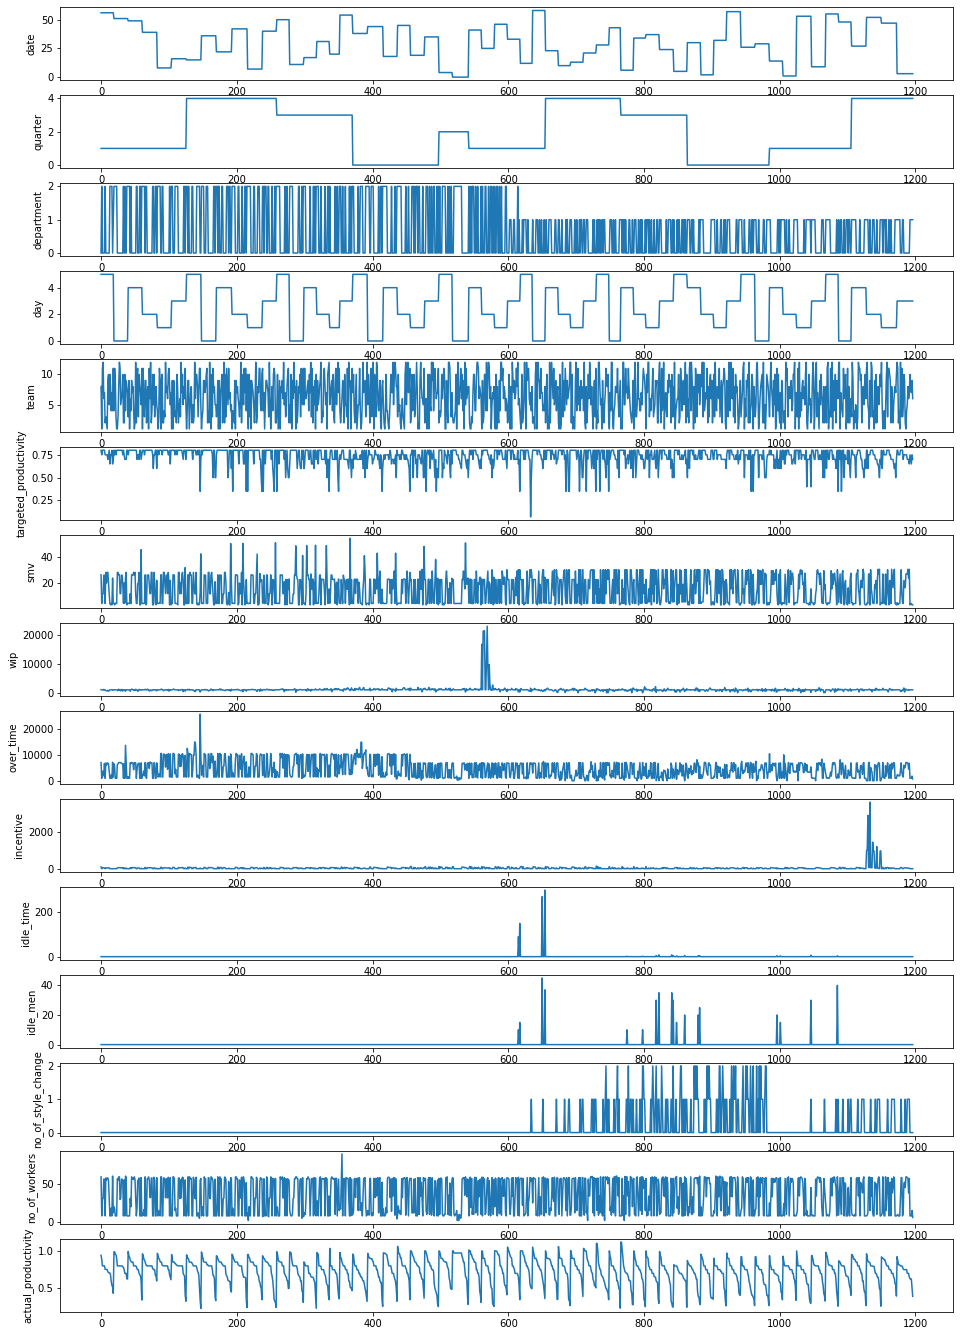

In [ ]:
var=dataset.columns.values
fig, ax = plt.subplots(len(var),1, figsize=(16,24) )

for i,C in enumerate(var):
    plt.subplot(len(var),1,i+1)
    plt.ylabel(var[i])
    
    plot_data=plt.plot(dataset[var[i]])
    #plt.legend (str(i),) #, loc='upper left')
    

In [ ]:

#plot_data=plt.plot(dataset['actual_productivity'])
#plt.ylabel('actual_productivity')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

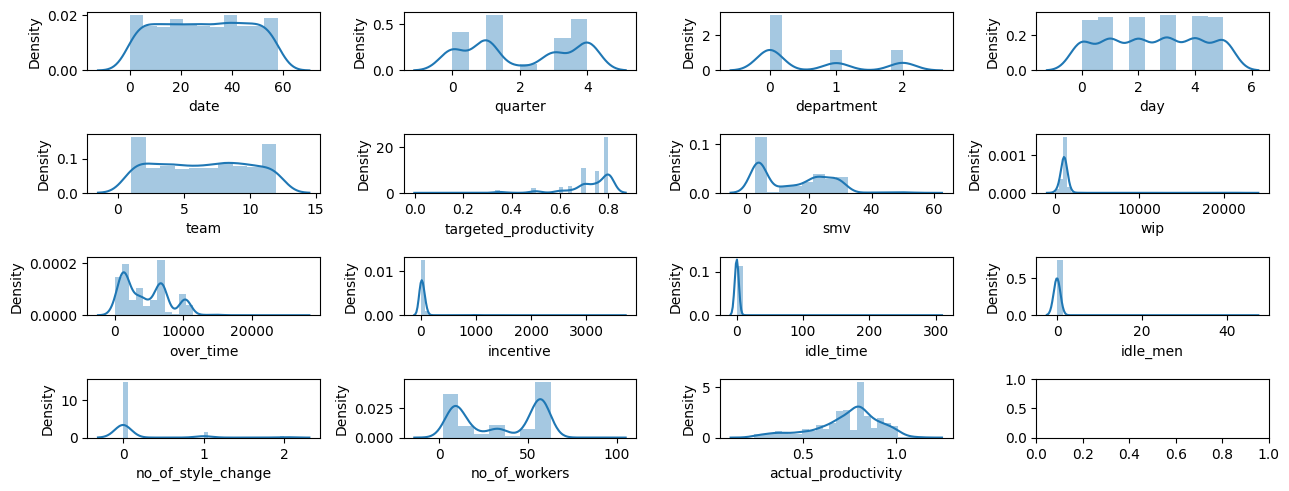

In [ ]:
width = 13
height = 5

plt.style.use("default")

figure, axes = plt.subplots(nrows=4, ncols=4, figsize=(width, height))

for column, axe in zip(dataset, axes.flatten()):
    sns.distplot(dataset[column], ax=axe)
    
plt.tight_layout()

#3. Preparando datos para el modelo

In [ ]:
x = dataset.drop("actual_productivity",axis=1)

y=dataset["actual_productivity"]

In [ ]:
x.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,56,1,0,5,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0
1,56,1,2,5,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0
2,56,1,0,5,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
3,56,1,0,5,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
4,56,1,0,5,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0


In [ ]:
y.head()

0    0.940725
1    0.886500
2    0.800570
3    0.800570
4    0.800382
Name: actual_productivity, dtype: float64

In [ ]:
x.dtypes

date                       int64
quarter                    int64
department                 int64
day                        int64
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
dtype: object

In [ ]:
y.dtypes

dtype('float64')

#2. Aplicacion de PCA

In [ ]:
df = dataset.iloc[:,:-1]
from sklearn.preprocessing import scale
X_norm = scale(x)   # Se puede llamara tambien solo la columnas del dataframe con df[X_col] donde X_col = ['xxx','yyy']

In [ ]:
X_norm.shape

(1197, 14)

In [ ]:
pd.DataFrame(X_norm, index=df.index, columns=df.columns)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,1.584558,-0.655173,-0.784309,1.460043,0.454323,0.719137,1.014552,-0.013197,0.750589,0.373414,-0.057473,-0.113005,-0.351617,1.099229
1,1.584558,-0.655173,1.676550,1.460043,-1.567329,0.208151,-1.016778,-0.062587,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268
2,1.584558,-0.655173,-0.784309,1.460043,1.320745,0.719137,-0.333878,-0.113407,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225
3,1.584558,-0.655173,-0.784309,1.460043,1.609552,0.719137,-0.333878,-0.113407,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225
4,1.584558,-0.655173,-0.784309,1.460043,-0.123292,0.719137,0.990783,0.031181,-0.790895,0.073631,-0.057473,-0.113005,-0.351617,0.964023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,-1.516372,1.271711,0.446121,0.277186,1.031937,0.208151,-1.111853,-0.062587,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268
1193,-1.516372,1.271711,0.446121,0.277186,0.454323,-0.302835,-1.020434,-0.062587,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268
1194,-1.516372,1.271711,0.446121,0.277186,0.165515,-0.813821,-1.020434,-0.062587,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268
1195,-1.516372,1.271711,0.446121,0.277186,0.743130,0.208151,-1.111853,-0.062587,-0.826743,-0.238643,-0.057473,-0.113005,-0.351617,-0.883788


##2.1 Calculo de componentes principales

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_norm)
pca_loadings = pca.components_    # Son los componentes principales

# Mostramos las cargas de cada componente principal en un DataFrame
pd.DataFrame(pca_loadings, columns=df.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'])

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
PC1,0.003561,-0.005501,-0.482283,0.015715,-0.050068,-0.083067,0.502759,0.029543,0.423421,0.029874,0.057199,0.083357,0.208504,0.519802
PC2,0.163712,-0.110264,0.050338,-0.091064,0.059646,-0.139345,-0.042364,-0.109077,-0.124151,-0.052470,0.658715,0.667693,0.116961,-0.044507
PC3,0.560335,-0.348485,-0.020408,-0.406615,-0.061867,0.300572,0.009580,0.327790,0.097197,0.295619,0.045060,-0.074405,-0.302782,0.032270
PC4,-0.290998,0.536327,-0.078485,0.102908,0.092664,0.484831,0.034652,0.080415,0.054995,0.319092,0.227246,0.173889,-0.414685,0.030367
PC5,0.277608,0.382137,-0.042979,-0.253273,0.121933,-0.242912,-0.015965,-0.400302,-0.147281,0.606435,-0.123734,-0.068119,0.258771,-0.013098
PC6,0.003761,0.157180,0.140268,0.056661,-0.938216,-0.191472,0.007035,0.026149,0.053307,0.128738,0.087309,0.016822,-0.080852,-0.029886
PC7,-0.334507,0.220745,0.004051,-0.524168,0.041086,-0.230578,-0.020712,0.655531,-0.140885,-0.007250,0.003539,0.027084,0.242480,-0.012700
PC8,0.085072,-0.154614,-0.015377,0.657452,0.123948,-0.236839,-0.073369,0.472577,-0.080328,0.461764,-0.004830,0.061516,0.108173,-0.031997
PC9,0.121245,0.188225,-0.002306,-0.026445,0.220167,-0.635521,-0.058120,0.024778,0.303912,-0.132794,0.127671,-0.131909,-0.590463,-0.021701
PC10,-0.602327,-0.544810,-0.010535,-0.189261,0.000636,-0.144117,-0.006952,-0.240161,0.063744,0.426352,0.077321,-0.037441,-0.180324,-0.014889


##2.2 Transformación de datos

In [ ]:
# Usando sklearn
pca_scores = pca.transform(X_norm)   #Rota la matriz rotada considerando la matriz de carga y los datos X

In [ ]:
# Visualizamos los puntajes para los primeros estados
df_plot = pd.DataFrame(pca_scores, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'], index=df.index)
df_plot

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,1.651983,-0.271573,1.063066,0.131083,-0.251437,-0.604719,-1.830910,1.045643,-0.014438,-0.718901,-0.018381,-0.194961,0.310752,0.119552
1,-2.401088,0.255760,0.515871,-0.937142,-0.499181,1.611902,-1.485282,0.941719,-0.448111,-0.989759,-0.044806,-0.074634,0.332796,0.049643
2,-0.181512,0.047900,0.734323,-0.034265,-0.098650,-1.484385,-1.670648,1.189349,0.009390,-0.858725,-0.039944,-0.534782,-0.533775,-0.146075
3,-0.195972,0.065126,0.716456,-0.007503,-0.063435,-1.755349,-1.658782,1.225146,0.072976,-0.858541,-0.050494,-0.510542,-0.501497,-0.145173
4,0.938332,-0.096736,0.870309,-0.104235,-0.292250,-0.178523,-1.603996,0.986486,-0.564861,-0.953822,0.169066,-1.424412,0.489436,0.233707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,-2.025843,-0.259527,-1.548818,1.211072,0.047232,-0.775847,0.701147,-0.049608,0.150524,0.067376,-0.068569,-0.215264,-0.317963,-0.150486
1193,-1.908516,-0.226648,-1.665795,0.912974,0.099466,-0.135437,0.793343,-0.006888,0.342781,0.140015,0.005269,-0.327803,-0.300268,-0.193635
1194,-1.851610,-0.172671,-1.801516,0.638469,0.188375,0.233366,0.899299,0.078336,0.603937,0.213473,0.064140,-0.398266,-0.312472,-0.191887
1195,-1.741143,-0.321948,-1.496380,1.207690,-0.029074,-0.500934,0.649921,-0.115657,0.156355,0.078491,-0.075432,-0.080910,-0.347226,0.074676


In [ ]:
PVE = pca.explained_variance_ratio_

# O, lo que es lo mismo:
# PVE = explained_variance / np.sum(explained_variance)

print('Proporción de varianza explicada (PVE) por cada componente principal:')
print(PVE)

Proporción de varianza explicada (PVE) por cada componente principal:
[0.24737045 0.11389176 0.08772834 0.08240751 0.07772891 0.0724884
 0.06828213 0.06718702 0.05944282 0.05193748 0.02982579 0.02413958
 0.01261825 0.00495157]


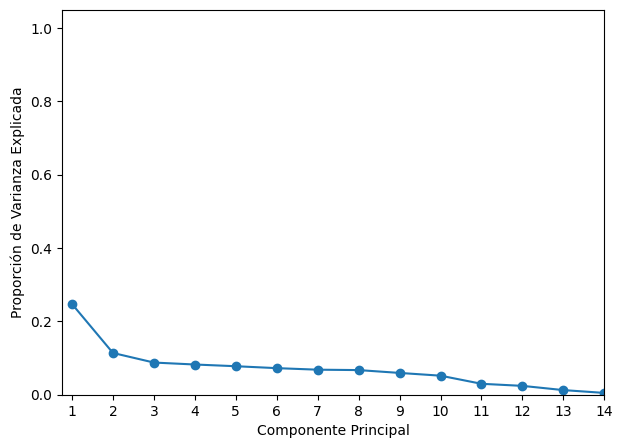

In [ ]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13, 14], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proporción de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13, 14])  # Actulizar segun el numero de componentes
plt.show()

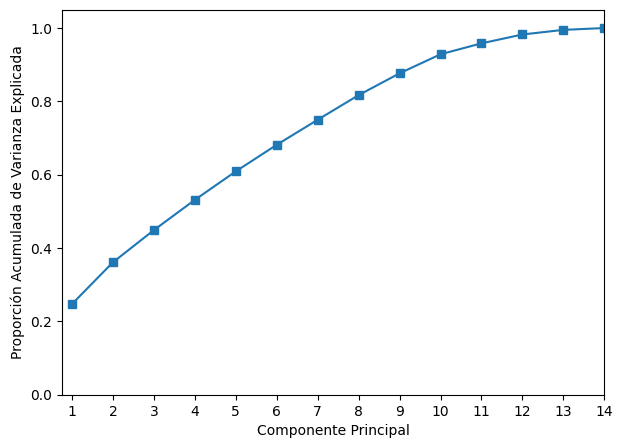

In [ ]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13, 14], np.cumsum(pca.explained_variance_ratio_), '-s')   # np.cumsum , calcula la suma acumulada
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13, 14])
plt.show()

## 2.3 Reducción de dimensionalidad con PCA

In [ ]:
pca2 = PCA(n_components=8) #0.95)  #, whiten = True ) #

In [ ]:
z = pca2.fit_transform(X_norm)   # Este metodo hace el ajuste y la transformación al mismo tiempo.
z

array([[ 1.65198339, -0.27157339,  1.06306648, ..., -0.60471865,
        -1.83090975,  1.04564278],
       [-2.40108846,  0.25576024,  0.51587096, ...,  1.6119018 ,
        -1.48528155,  0.94171928],
       [-0.18151174,  0.04789968,  0.73432323, ..., -1.48438531,
        -1.67064828,  1.18934882],
       ...,
       [-1.85160971, -0.17267133, -1.8015156 , ...,  0.2333664 ,
         0.89929938,  0.078336  ],
       [-1.74114301, -0.3219481 , -1.49637962, ..., -0.50093447,
         0.64992098, -0.11565697],
       [-2.00276882, -0.24431482, -1.64081335, ...,  0.40471914,
         0.78275058, -0.06313173]])

In [ ]:
dataset.shape

(1197, 15)

In [ ]:
dataset.keys()

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [ ]:
#Inputs
inputs_names = ['date','quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers']

input_dataset    = dataset[inputs_names]

input_dataset_np = input_dataset.values # convierte el Dataset a array se puede utilizar también to_numpy()
input_dataset_np

array([[56. ,  1. ,  0. , ...,  0. ,  0. , 59. ],
       [56. ,  1. ,  2. , ...,  0. ,  0. ,  8. ],
       [56. ,  1. ,  0. , ...,  0. ,  0. , 30.5],
       ...,
       [ 3. ,  4. ,  1. , ...,  0. ,  0. ,  8. ],
       [ 3. ,  4. ,  1. , ...,  0. ,  0. , 15. ],
       [ 3. ,  4. ,  1. , ...,  0. ,  0. ,  6. ]])

In [ ]:
#Outputs

# Variable to predict
output_name          = 'actual_productivity'
outputs_names         = [output_name]
outputs_dataset       = dataset[outputs_names]

outputs_dataset_np    = outputs_dataset.values
outputs_dataset_np

array([[0.94072542],
       [0.8865    ],
       [0.80057049],
       ...,
       [0.625625  ],
       [0.50588889],
       [0.39472222]])

#3 Aplicacion Feedforward Neural Network

In [ ]:
#Instalamons o Actualizamos pyrenn
!pip install --upgrade pyrenn

Requirement already up-to-date: pyrenn in /usr/local/lib/python3.7/dist-packages (0.1)


In [ ]:
#import pyrenn as prn
import pyrenn as prn

In [ ]:
#Inputs
inputs_namesPRN = ['date','quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers']

#Outputs
# Variable to predict
output_name          = 'actual_productivity'


In [ ]:
#Train_Test RMLP with Pyreen Package / LEVENBERG-MARQUARDT Training Optimization
#https://pyrenn.readthedocs.io/en/latest/create.html#feed-forward-neural-networks-in-pyrenn

#Inputs

input_datasetPRN   = dataset[inputs_namesPRN]
input_datasetPRNT   = input_datasetPRN.transpose()

valuesPRN          = input_datasetPRN.values
valuesPRNInput     = valuesPRN.astype('float32')
valuesPRNInput     = valuesPRNInput.transpose()

#Outputs - variable to predict
outputs_namesPRN         = [output_name]
outputs_datasetPRN       = dataset[outputs_namesPRN]
outputs_datasetPRNT       = outputs_datasetPRN.transpose()

valuesPRNOutput          = outputs_datasetPRN.values

# ensure all data is float
valuesPRNOutput = valuesPRNOutput.astype('float32')

In [ ]:
# Split in test and train Pyrenn

xtrainPRN, xtestPRN, ytrainPRN, ytestPRN = train_test_split(input_datasetPRN
                                                            ,outputs_datasetPRN,
                                                            test_size=0.20)
xtrainPRN  = xtrainPRN.values
xtrainPRN  = xtrainPRN.transpose()
xtestPRN   = xtestPRN.values
xtestPRN   = xtestPRN.transpose()
ytrainPRN  = ytrainPRN.values
ytrainPRN  = ytrainPRN.transpose()
ytestPRN   = ytestPRN.values
ytestPRN   = ytestPRN.transpose()


In [ ]:
#Create Feedforward Neural Network with 9 input, 4 hidden layers with 16 neurons each and 1 output
#Activation Function: Hidden Layers - tanh, Output Layer - Linear
netLM = prn.CreateNN([14,4,16,1],dIn=[0],dIntern=[],dOut=[])
netLM = prn.train_LM(xtrainPRN,ytrainPRN,netLM,verbose=True,k_max=300,E_stop=1e-3)
yPRNPredict = prn.NNOut(valuesPRNInput,netLM)
# ensure all data is float
yPRNPredict = yPRNPredict.astype('float32')

Iteration:  0 		Error:  1406.1659868693328 	scale factor:  3.0
Iteration:  1 		Error:  19.628196023873564 	scale factor:  0.3
Iteration:  2 		Error:  19.450873071878693 	scale factor:  0.03
Iteration:  3 		Error:  16.361376267421186 	scale factor:  0.3
Iteration:  4 		Error:  16.104090633169942 	scale factor:  0.3
Iteration:  5 		Error:  15.93471776859362 	scale factor:  0.3
Iteration:  6 		Error:  15.703390502412516 	scale factor:  0.03
Iteration:  7 		Error:  14.719999332786063 	scale factor:  0.3
Iteration:  8 		Error:  14.302606536855558 	scale factor:  0.03
Iteration:  9 		Error:  13.299004873793834 	scale factor:  0.03
Iteration:  10 		Error:  13.014236678913779 	scale factor:  0.03
Iteration:  11 		Error:  11.88282581689541 	scale factor:  0.03
Iteration:  12 		Error:  11.566461278397028 	scale factor:  0.03
Iteration:  13 		Error:  11.393537735416633 	scale factor:  0.03
Iteration:  14 		Error:  11.314264453663759 	scale factor:  0.03
Iteration:  15 		Error:  11.255437371414452

Text(0.5, 1.0, 'Regresión Exp vs Pred')

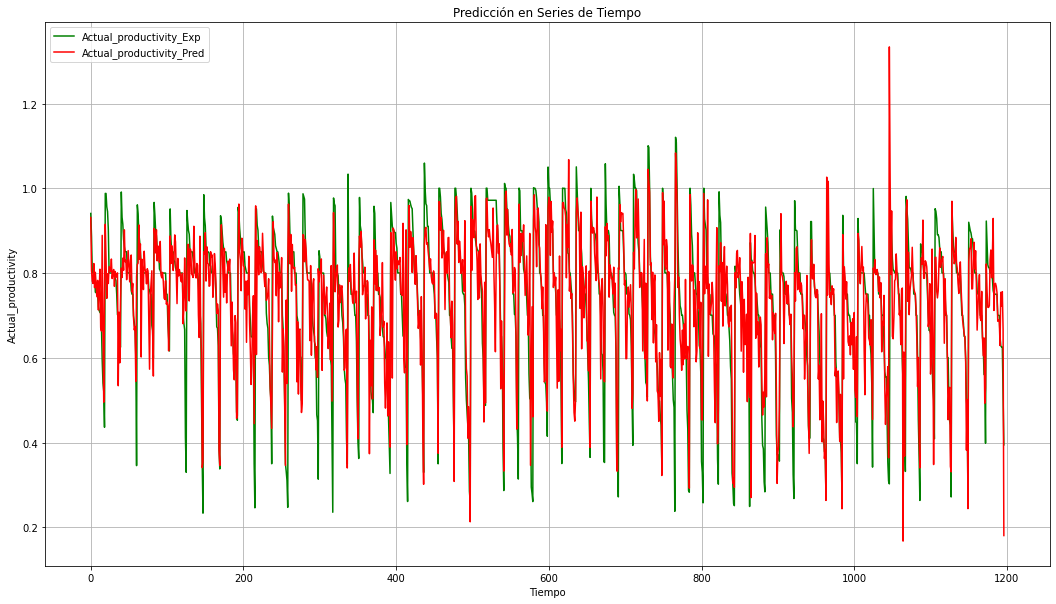

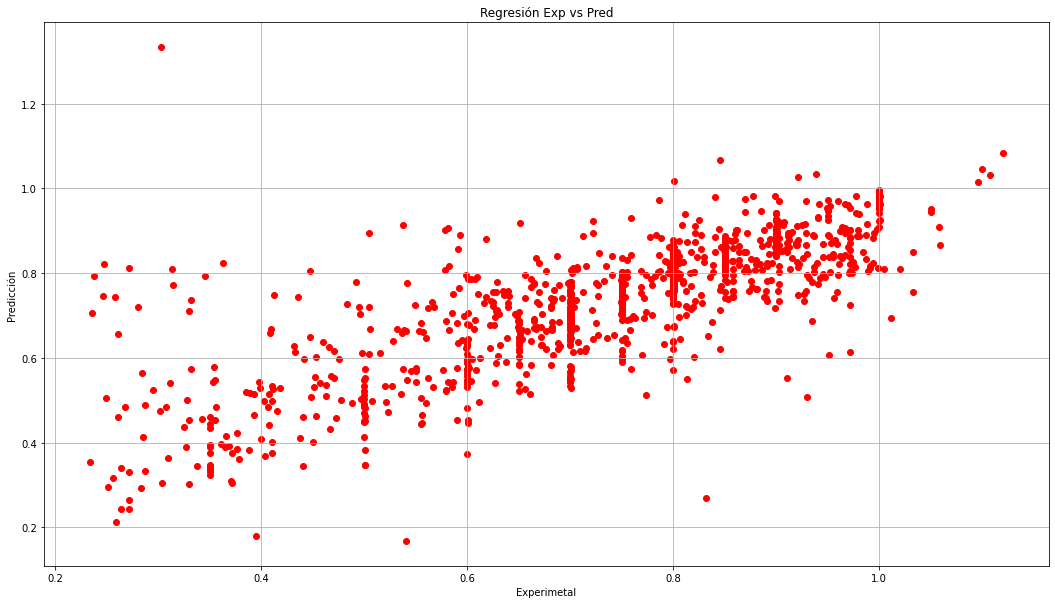

In [ ]:
#Plots Predictions
#%matplotlib qt
%matplotlib inline
plt.figure(figsize=(18,10))
plt.grid()
plt.plot(valuesPRNOutput,'g',label='YExperimental')
plt.plot(yPRNPredict,'r',label='yPRN_Predict')
plt.ylabel('Actual_productivity')
plt.xlabel('Tiempo')
plt.legend(['Actual_productivity_Exp','Actual_productivity_Pred'], loc='upper left')  
plt.title('Predicción en Series de Tiempo')

plt.figure(figsize=(18,10))
plt.grid()
plt.scatter(valuesPRNOutput,yPRNPredict,c='r')
plt.xlabel('Experimetal')
plt.ylabel('Predicción')
plt.title('Regresión Exp vs Pred')

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
import scipy.stats

# calculate RMSE
rmsePRN = sqrt(mean_squared_error(valuesPRNOutput, yPRNPredict))
print('Test RMSE: %.5f' %rmsePRN)
msePRN = mean_squared_error(valuesPRNOutput, yPRNPredict)
#nmsePRN = (1/((len(valuesPRNOutput))*(np.std(valuesPRNOutput)**2)))*msePRN
NrmsePRN = (1/(valuesPRNOutput.max()-valuesPRNOutput.min()))*rmsePRN
print('Test NRMSE: %.5f' %(NrmsePRN*100))
print('Test MSE: %.5f' %(msePRN))


valuesPRNOutputV = valuesPRNOutput[:,0]
CoefCorr = scipy.stats.pearsonr(valuesPRNOutputV,yPRNPredict)

print('Coef R^2: %.5f' %pow(CoefCorr[0],2))

Test RMSE: 0.10974
Test NRMSE: 12.37601
Test MSE: 0.01204
Coef R^2: 0.60894


In [ ]:
import pandas as pd
df = pd.DataFrame(valuesPRNOutput,yPRNPredict)
df

,0
0.931063,0.940725
0.806376,0.886500
0.781028,0.800570
0.775541,0.800570
0.822665,0.800382
...,...
0.754718,0.628333
0.721669,0.625625
0.756296,0.625625
0.667458,0.505889


In [ ]:
yPRNPredictTest = prn.NNOut(xtestPRN,netLM)

In [ ]:
import pandas as pd
df1 = pd.DataFrame(ytestPRN.transpose(),yPRNPredictTest)
df1

,0
0.588273,0.628333
0.985187,1.000230
0.716629,0.899111
0.796159,0.858144
0.585865,0.649981
...,...
0.767264,0.662256
0.941767,1.000345
0.719082,0.813309
0.578438,0.700605


#3 Aplicacion Feedforward Neural Network + PCA

In [ ]:
#Inputs
inputs_namesPRN = ['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers']

#Outputs
# Variable to predict
output_name          = 'actual_productivity'


In [ ]:
z.shape

(1197, 8)

In [ ]:
#Train_Test RMLP with Pyreen Package / LEVENBERG-MARQUARDT Training Optimization
#Inputs

input_datasetPRN   = z #dataset[inputs_namesPRN]
input_datasetPRNT   = input_datasetPRN.transpose()

valuesPRN          = input_datasetPRN #.values
valuesPRNInput     = valuesPRN.astype('float32')
valuesPRNInput     = valuesPRNInput.transpose()

#Outputs - variable to predict
outputs_namesPRN         = [output_name]
outputs_datasetPRN       = dataset[outputs_namesPRN]
outputs_datasetPRNT       = outputs_datasetPRN.transpose()

valuesPRNOutput          = outputs_datasetPRN.values

# ensure all data is float
valuesPRNOutput = valuesPRNOutput.astype('float32')

In [ ]:
# Split in test and train Pyrenn

xtrainPRN, xtestPRN, ytrainPRN, ytestPRN = train_test_split(input_datasetPRN
                                                            ,outputs_datasetPRN,
                                                            test_size=0.20)
#xtrainPRN  = xtrainPRN.values
xtrainPRN  = xtrainPRN.transpose()
#xtestPRN   = xtestPRN.values
xtestPRN   = xtestPRN.transpose()
ytrainPRN  = ytrainPRN.values
ytrainPRN  = ytrainPRN.transpose()
ytestPRN   = ytestPRN.values
ytestPRN   = ytestPRN.transpose()


In [ ]:
#Create Feedforward Neural Network with 9 input, 4 hidden layers with 16 neurons each and 1 output
#Activation Function: Hidden Layers - tanh, Output Layer - Linear
netLM = prn.CreateNN([8,4,16,1],dIn=[0],dIntern=[],dOut=[])
netLM = prn.train_LM(xtrainPRN,ytrainPRN,netLM,verbose=True,k_max=600,E_stop=1e-3)
yPRNPredict = prn.NNOut(valuesPRNInput,netLM)
# ensure all data is float
yPRNPredict = yPRNPredict.astype('float32')

Iteration:  0 		Error:  324.48399464234626 	scale factor:  3.0
Iteration:  1 		Error:  27.142241160498653 	scale factor:  0.3
Iteration:  2 		Error:  18.455397361040674 	scale factor:  0.03
Iteration:  3 		Error:  17.430802063416923 	scale factor:  0.03
Iteration:  4 		Error:  17.214343383204337 	scale factor:  0.03
Iteration:  5 		Error:  16.990180527868343 	scale factor:  0.03
Iteration:  6 		Error:  16.73221903009664 	scale factor:  0.03
Iteration:  7 		Error:  16.563500969274983 	scale factor:  0.03
Iteration:  8 		Error:  16.368067315165767 	scale factor:  0.03
Iteration:  9 		Error:  16.058191834308555 	scale factor:  0.03
Iteration:  10 		Error:  15.905877436848993 	scale factor:  0.03
Iteration:  11 		Error:  15.80240950514753 	scale factor:  0.03
Iteration:  12 		Error:  15.696816525736851 	scale factor:  0.03
Iteration:  13 		Error:  15.570470060541043 	scale factor:  0.03
Iteration:  14 		Error:  15.424475946591144 	scale factor:  0.03
Iteration:  15 		Error:  15.27499725287

Text(0.5, 1.0, 'Regresión Exp vs Pred')

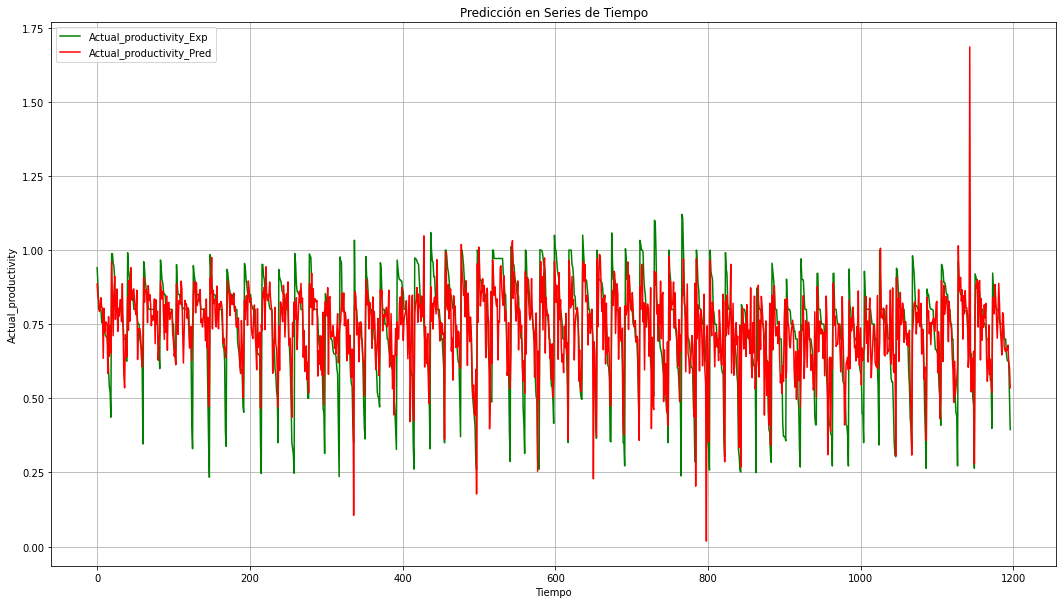

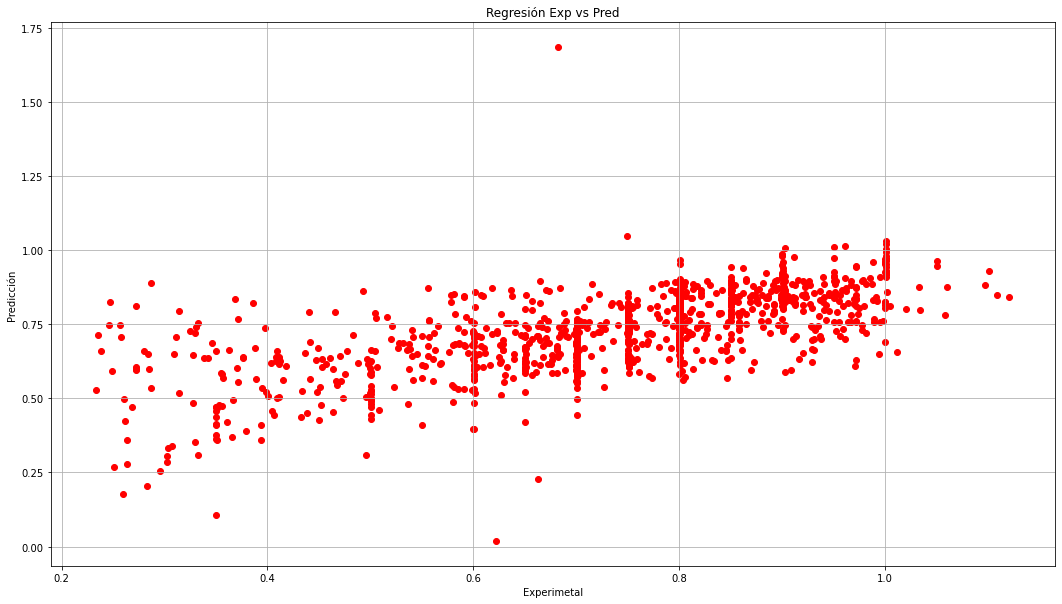

In [ ]:
#Plots Predictions
#%matplotlib qt
%matplotlib inline
plt.figure(figsize=(18,10))
plt.grid()
plt.plot(valuesPRNOutput,'g',label='YExperimental')
plt.plot(yPRNPredict,'r',label='yPRN_Predict')
plt.ylabel('Actual_productivity')
plt.xlabel('Tiempo')
plt.legend(['Actual_productivity_Exp','Actual_productivity_Pred'], loc='upper left')  
plt.title('Predicción en Series de Tiempo')

plt.figure(figsize=(18,10))
plt.grid()
plt.scatter(valuesPRNOutput,yPRNPredict,c='r')
plt.xlabel('Experimetal')
plt.ylabel('Predicción')
plt.title('Regresión Exp vs Pred')

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
import scipy.stats

# calculate RMSE
rmsePRN = sqrt(mean_squared_error(valuesPRNOutput, yPRNPredict))
print('Test RMSE: %.5f' %rmsePRN)
msePRN = mean_squared_error(valuesPRNOutput, yPRNPredict)
#nmsePRN = (1/((len(valuesPRNOutput))*(np.std(valuesPRNOutput)**2)))*msePRN
NrmsePRN = (1/(valuesPRNOutput.max()-valuesPRNOutput.min()))*rmsePRN
print('Test NRMSE: %.5f' %(NrmsePRN*100))
print('Test MSE: %.5f' %(msePRN))


valuesPRNOutputV = valuesPRNOutput[:,0]
CoefCorr = scipy.stats.pearsonr(valuesPRNOutputV,yPRNPredict)

print('Coef R^2: %.5f' %pow(CoefCorr[0],2))

Test RMSE: 0.13072
Test NRMSE: 14.74204
Test MSE: 0.01709
Coef R^2: 0.44713


In [ ]:
import pandas as pd
df = pd.DataFrame(valuesPRNOutput,yPRNPredict)
df

,0
0.885938,0.940725
0.844595,0.886500
0.828879,0.800570
0.792760,0.800570
0.800673,0.800382
...,...
0.661933,0.628333
0.679560,0.625625
0.620436,0.625625
0.604964,0.505889


In [ ]:
yPRNPredictTest = prn.NNOut(xtestPRN,netLM)

In [ ]:
import pandas as pd
df1 = pd.DataFrame(ytestPRN.transpose(),yPRNPredictTest)
df1

,0
0.798298,0.940625
0.571477,0.700355
0.806543,0.707111
0.610819,0.553333
0.706251,0.700542
...,...
0.755744,0.800402
0.510603,0.500034
0.757667,0.966667
0.706544,0.650243
